## Hackathon
1. Create a team (3-4 people)
2. Perform the following:
    1. **Data Wrangling - Cleaning & Merging**: Make data usable for analysis.
    2. **Feature Engineering**: Make new features or change the current features
    3. **Feature Selection**: Choose the best features
    4. **Model Design**: Design and implement the model
    5. **Model Evaluation**: Evaluate the model

## Submission Guideline
The output expected at the end of this hackathon is:
1. One **Jupyter notebook** containing all analysis performed using Python.
2. One **PowerPoint** presentation containing the analysis results. Each group will be allocated 15-20 minutes (inclusive of Q&A) to present their analysis results to the class.
3. One **Final Dataset** - Based on the selected features for training & testing the model (in csv format)


## Presentation Guideline



**Note(s):**
1. Only **one submission** is required per group.
2. Include full details in your notebook and **report only important results** in your presentation.
3. Please only use Jupyter notebook (SQL/pandas) to clean the data (Do not clean manually using Excel)

## Business Problem:

***One of the global banks would like to understand what factors drive credit card spending in order to set a proper credit limit. To solve this problem, the bank conducted a survey of 5000 customers and collected data.
The objective of this capstone is to understand what is driving the total spend (Primary Card + Secondary card). Given the variables, predict the credit limit for new applicants***


## Data Availability:

- Data for the case are available in xlsx format(Data Set.xlxs).
- The data have been provided for 5000 customers.
- Detailed data dictionary has been provided for understanding the data.
- Data is encoded in numerical format to reduce the size of the data however some of the variables are categorical. You can  find the details in the data dictionary.


## Data Dictonary

For data dictonary follow the "Data Dictionary.xlxs"

## 1. Import necessary Packages

In [1]:
# import relevant modules
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sn
import scipy.stats as stats
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Settings
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [4]:
!pip install ipython-sql

In [2]:
%load_ext sql

## 2. Load and Inspect Data

In [3]:
credit_card = pd.read_excel("Data Set.xlsx")

In [4]:
credit_card.head(5)

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,cardspent,card2spent,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,1,0,1,0,31,3.433987,2,11.1,1.200909,0.183079,2.240091,0.806516,1,1,0,-1,-1,3,0,0,0,0,0,0,0,0,0,2,0,1,2,1,0,14.3,1,0,0,8,4,22.0,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,81.66,67.80,0,3,5,1,6.50,1.871802,34.40,3.538057,1,29.0,3.367296,161.05,5.081715,1,29.50,3.384390,126.1,4.837075,1,14.25,2.656757,60.0,4.094345,0,0.00,NaN,0.00,NaN,1,1,1,0,0,1,1,1,0,1,13,1,1,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,0,0,1,0,15,2.708050,1,18.6,1.222020,0.200505,1.567980,0.449788,1,1,0,-1,-1,2,6,0,0,0,0,0,0,6,1,3,2,1,2,1,1,6.8,1,0,0,1,1,29.0,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,2,4,1,3,0,4,2,42.60,34.94,1,1,39,0,8.90,2.186051,330.60,5.800909,0,0.0,NaN,0.00,NaN,1,54.85,4.004602,1975.0,7.588324,1,16.00,2.772589,610.0,6.413459,1,45.65,3.821004,1683.55,7.428660,1,1,1,4,1,0,1,0,1,1,18,1,1,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,0,16,5,0,35,3.555348,2,9.9,0.928620,-0.074056,2.536380,0.930738,0,4,1,13,2,3,3,2,1,0,0,0,0,0,1,1,30,5,3,1,1,18.8,1,0,1,4,3,24.0,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,35,5,4,1,3,0,25,5,184.22,175.75,0,3,65,0,28.40,3.346389,1858.35,7.527444,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.0,NaN,1,23.00,3.135494,1410.0,7.251345,0,0.00,NaN,0.00,NaN,1,0,0,0,0,0,0,0,0,1,21,1,1,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3.0,0,23,2,May,16,3,2,0,0,1,0,20,2.995732,1,5.7,0.022800,-3.780995,1.117200,0.110826,1,2,1,18,4,5,0,0,0,0,0,0,0,0,1,3,3,2,3,1,1,8.7,1,0,1,1,1,38.0,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,5,2,3,2,4,0,5,2,340.99,18.42,1,1,36,0,6.00,1.791759,199.45,5.295564,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.0,NaN,1,21.00,3.044522,685.0,6.529419,0,0.00,NaN,0.00,NaN,1,0,0,2,0,0,0,0,1,1,26,1,1,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2.0,0,26,3,July,16,3,2,0,1,1,0,23,3.135494,1,1.7,0.214659,-1.538705,0.176341,-1.735336,0,1,1,13,2,4,0,0,0,0,0,0,0,0,0,2,3,2,1,0,1,10.6,1,0,1,6,3,32.0,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,8,3,1,3,2,0,9,3,255.10,252.73,1,3,21,0,3.05,1.115142,74.10,4.305416,1,16.5,2.803360,387.70,5.960232,0,0.00,NaN,0.0,NaN,1,17.25,2.847812,360.0,5.886104,1,19.05,2.947067,410.80,6.018106,0,1,0,3,1,1,1,1,0,1,27,1,1,1,0,1,0,1,0,0,0,1,0


In [5]:
credit_card.describe()

,region,townsize,gender,age,agecat,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,cardspent,card2spent,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
count,5000.00000,4998.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0000,5000.00000,5000.000000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4999.000000,5000.000000,4999.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4998.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,4997.000000,4997.000000,5000.000000,5000.000000,2378.000000,5000.000000,2378.000000,5000.000000,5000.000000,1704.000000,5000.000000,1704.000000,5000.000000,5000.000000,3581.000000,4998.000000,3578.000000,5000.00000,5000.000000,1344.000000,5000.000000,1344.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,3.00140,2.687275,0.503600,47.025600,4.238800,14.543000,2.672000,2.7528,0.15120,9.730400,2.9326,0.147600,54.759600,3.699909,2.392200,9.954160,1.857326,-0.130454,3.654460,0.696915,0.23420,2.964200,0.480200,6.112800,0.641400,2.204000,3.067400,0.500400,0.392400,0.110400,0.055600,0.114600,0.046600,1.847400,0.62960,1.84260,16.402400,3.272000,2.130600,0.641400,0.343800,23.232580,1.389400,0.221000,0.361000,2.996200,1.973400,25.345538,0.679000,0.102600,0.271800,0.406000,0.274600,0.095400,0.123400,0.383800,0.058400,0.188000,7.636800,4.08860,0.381400,0.238400,0.518000,2.714200,2.507000,2.505800,0.189800,16.655800,3.782200,2.774400,2.541200,2.534000,0.187200,13.084400,3.571400,337.202520,160.876110,0.466000,2.05860,38.204800,0.253200,13.471450,2.288779,708.871753,5.611298,0.475600,13.264450,3.243230,577.832510,6.584783,0.340800,12.991310,3.600238,470.176400,6.747296,0.716200,15.443850,2.909733,720.478391,6.426309,0.26880,10.701190,3.605001,421.984610,6.808132,0.488400,0.303000,0.243600,1.199600,0.475200,0.479000,0.480600,0.478000,0.348600,0.983000,19.645000,0.915600,0.913600,0.932800,0.201000,0.63280,0.479200,0.474800,0.178800,0.472600,0.083600,0.129800,0.102600
std,1.42176,1.425925,0.500037,17.770338,1.308785,3.281083,1.211738,1.7379,0.35828,9.690929,1.4533,0.354739,55.377511,0.747072,1.221261,6.399783,3.4157

## 3. Data Wrangling

### 3.1 Merge/Clean Data
- Do whatever is necessary to prepare the data for data analysis
- Use SQL/pandas for data merging
- Clean the data using jupyter notebook

Note: Do not clean data manually using excel

In [6]:
# To create Y we need to sum up cardspent(first card spent amount) and card2spent(Second card spent amount)
credit_card['sum_spent']= credit_card['cardspent']+credit_card['card2spent']

In [7]:
credit_card.head(5)

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,cardspent,card2spent,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,sum_spent
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,1,0,1,0,31,3.433987,2,11.1,1.200909,0.183079,2.240091,0.806516,1,1,0,-1,-1,3,0,0,0,0,0,0,0,0,0,2,0,1,2,1,0,14.3,1,0,0,8,4,22.0,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,81.66,67.80,0,3,5,1,6.50,1.871802,34.40,3.538057,1,29.0,3.367296,161.05,5.081715,1,29.50,3.384390,126.1,4.837075,1,14.25,2.656757,60.0,4.094345,0,0.00,NaN,0.00,NaN,1,1,1,0,0,1,1,1,0,1,13,1,1,0,0,0,1,1,0,0,0,1,0,149.46
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,0,0,1,0,15,2.708050,1,18.6,1.222020,0.200505,1.567980,0.449788,1,1,0,-1,-1,2,6,0,0,0,0,0,0,6,1,3,2,1,2,1,1,6.8,1,0,0,1,1,29.0,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,2,4,1,3,0,4,2,42.60,34.94,1,1,39,0,8.90,2.186051,330.60,5.800909,0,0.0,NaN,0.00,NaN,1,54.85,4.004602,1975.0,7.588324,1,16.00,2.772589,610.0,6.413459,1,45.65,3.821004,1683.55,7.428660,1,1,1,4,1,0,1,0,1,1,18,1,1,1,1,1,1,1,1,1,0,0,0,77.54
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,0,16,5,0,35,3.555348,2,9.9,0.928620,-0.074056,2.536380,0.930738,0,4,1,13,2,3,3,2,1,0,0,0,0,0,1,1,30,5,3,1,1,18.8,1,0,1,4,3,24.0,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,35,5,4,1,3,0,25,5,184.22,175.75,0,3,65,0,28.40,3.346389,1858.35,7.527444,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.0,NaN,1,23.00,3.135494,1410.0,7.251345,0,0.00,NaN,0.00,NaN,1,0,0,0,0,0,0,0,0,1,21,1,1,1,0,0,0,0,0,1,0,0,0,359.97
3,4459-VLPQUH-3OL,4,3.0,0,23,2,May,16,3,2,0,0,1,0,20,2.995732,1,5.7,0.022800,-3.780995,1.117200,0.110826,1,2,1,18,4,5,0,0,0,0,0,0,0,0,1,3,3,2,3,1,1,8.7,1,0,1,1,1,38.0,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,5,2,3,2,4,0,5,2,340.99,18.42,1,1,36,0,6.00,1.791759,199.45,5.295564,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.0,NaN,1,21.00,3.044522,685.0,6.529419,0,0.00,NaN,0.00,NaN,1,0,0,2,0,0,0,0,1,1,26,1,1,1,0,1,1,1,0,1,1,0,0,359.41
4,8158-SMTQFB-CNO,2,2.0,0,26,3,July,16,3,2,0,1,1,0,23,3.135494,1,1.7,0.214659,-1.538705,0.176341,-1.735336,0,1,1,13,2,4,0,0,0,0,0,0,0,0,0,2,3,2,1,0,1,10.6,1,0,1,6,3,32.0,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,8,3,1,3,2,0,9,3,255.10,252.73,1,3,21,0,3.05,1.115142,74.10,4.305416,1,16.5,2.803360,387.70,5.960232,0,0.00,NaN,0.0,NaN,1,17.25,2.847812,360.0,5.886104,1,19.05,2.947067,410.80,6.018106,0,1,0,3,1,1,1,1,0,1,27,1,1,1,0,1,0,1,0,0,0,1,0,507.83


In [8]:
# Show the data again with the new Y column added
credit_card.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,cardspent,card2spent,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,sum_spent
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,1,0,1,0,31,3.433987,2,11.1,1.200909,0.183079,2.240091,0.806516,1,1,0,-1,-1,3,0,0,0,0,0,0,0,0,0,2,0,1,2,1,0,14.3,1,0,0,8,4,22.0,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,81.66,67.80,0,3,5,1,6.50,1.871802,34.40,3.538057,1,29.0,3.367296,161.05,5.081715,1,29.50,3.384390,126.1,4.837075,1,14.25,2.656757,60.0,4.094345,0,0.00,NaN,0.00,NaN,1,1,1,0,0,1,1,1,0,1,13,1,1,0,0,0,1,1,0,0,0,1,0,149.46
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,0,0,1,0,15,2.708050,1,18.6,1.222020,0.200505,1.567980,0.449788,1,1,0,-1,-1,2,6,0,0,0,0,0,0,6,1,3,2,1,2,1,1,6.8,1,0,0,1,1,29.0,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,2,4,1,3,0,4,2,42.60,34.94,1,1,39,0,8.90,2.186051,330.60,5.800909,0,0.0,NaN,0.00,NaN,1,54.85,4.004602,1975.0,7.588324,1,16.00,2.772589,610.0,6.413459,1,45.65,3.821004,1683.55,7.428660,1,1,1,4,1,0,1,0,1,1,18,1,1,1,1,1,1,1,1,1,0,0,0,77.54
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,0,16,5,0,35,3.555348,2,9.9,0.928620,-0.074056,2.536380,0.930738,0,4,1,13,2,3,3,2,1,0,0,0,0,0,1,1,30,5,3,1,1,18.8,1,0,1,4,3,24.0,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,35,5,4,1,3,0,25,5,184.22,175.75,0,3,65,0,28.40,3.346389,1858.35,7.527444,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.0,NaN,1,23.00,3.135494,1410.0,7.251345,0,0.00,NaN,0.00,NaN,1,0,0,0,0,0,0,0,0,1,21,1,1,1,0,0,0,0,0,1,0,0,0,359.97
3,4459-VLPQUH-3OL,4,3.0,0,23,2,May,16,3,2,0,0,1,0,20,2.995732,1,5.7,0.022800,-3.780995,1.117200,0.110826,1,2,1,18,4,5,0,0,0,0,0,0,0,0,1,3,3,2,3,1,1,8.7,1,0,1,1,1,38.0,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,5,2,3,2,4,0,5,2,340.99,18.42,1,1,36,0,6.00,1.791759,199.45,5.295564,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.0,NaN,1,21.00,3.044522,685.0,6.529419,0,0.00,NaN,0.00,NaN,1,0,0,2,0,0,0,0,1,1,26,1,1,1,0,1,1,1,0,1,1,0,0,359.41
4,8158-SMTQFB-CNO,2,2.0,0,26,3,July,16,3,2,0,1,1,0,23,3.135494,1,1.7,0.214659,-1.538705,0.176341,-1.735336,0,1,1,13,2,4,0,0,0,0,0,0,0,0,0,2,3,2,1,0,1,10.6,1,0,1,6,3,32.0,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,8,3,1,3,2,0,9,3,255.10,252.73,1,3,21,0,3.05,1.115142,74.10,4.305416,1,16.5,2.803360,387.70,5.960232,0,0.00,NaN,0.0,NaN,1,17.25,2.847812,360.0,5.886104,1,19.05,2.947067,410.80,6.018106,0,1,0,3,1,1,1,1,0,1,27,1,1,1,0,1,0,1,0,0,0,1,0,507.83


### Drop Variables

In [9]:
# Drop cardspent(first card spent amount) and card2spent(Second card spent amount) because its not adding any value
# Also  we are droping "custid","birthmonth" bacuse cust id is unique and birth month is not adding any value
credit_card=credit_card.drop(['cardspent','card2spent', 'custid', 'birthmonth'], axis=1)

### Check linearity of data:

1. Use scatter plot by using 'df.plot' or if you want a linear line you can use 'sns.lmplot' through seaborn.

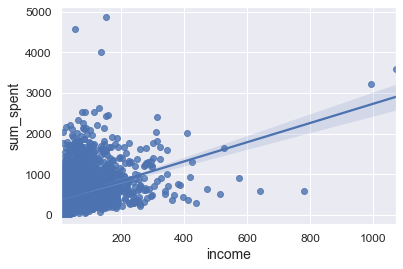

In [10]:
sns.regplot(x="income", y="sum_spent", data=credit_card);

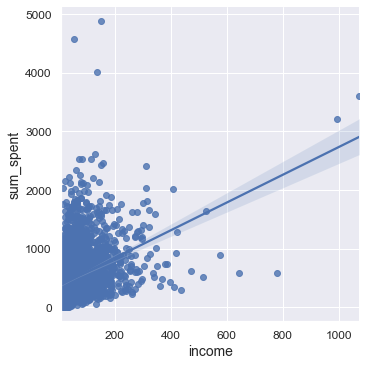

In [11]:
sns.lmplot(x="income", y="sum_spent", data=credit_card);

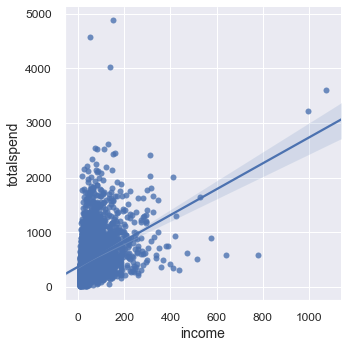

In [30]:
# Seaborn scatter plot with regression line


### What do you notice about the data points?

In [12]:
# Creating Categorical List = Contains categorical variables...

categorical = ['region', 'townsize', 'gender', 'agecat', 'edcat', 'jobcat', 'union', 'employ', 'empcat', 'retire', 'inccat', 'default', 'jobsat', 'marital', 'spousedcat', 'homeown', 'hometype', 'address', 'addresscat', 'cars', 'carown', 'cartype', 'carcatvalue', 'carbought', 'carbuy', 'commute', 'commutecat', 'commutecar', 'commutemotorcycle', 'commutecarpool', 'commutebus', 'commuterail', 'commutepublic', 'commutebike', 'commutewalk', 'commutenonmotor', 'telecommute', 'reason', 'polview', 'polparty', 'polcontrib', 'vote', 'card', 'cardtype', 'cardbenefit', 'cardfee', 'cardtenure', 'cardtenurecat', 'card2', 'card2type', 'card2benefit', 'card2fee', 'card2tenure', 'card2tenurecat', 'active', 'bfast', 'churn', 'tollfree', 'equip', 'callcard', 'wireless', 'multline', 'voice', 'pager', 'internet', 'callid', 'callwait', 'forward', 'confer', 'ebill', 'owntv', 'ownvcr', 'owndvd', 'owncd', 'ownpda', 'ownpc', 'ownipod', 'owngame', 'ownfax', 'news', 'response_01', 'response_02', 'response_03']

### 3.2 Check column types: categorical, numerical

In [13]:
credit_card[categorical]

,region,townsize,gender,agecat,edcat,jobcat,union,employ,empcat,retire,inccat,default,jobsat,marital,spousedcat,homeown,hometype,address,addresscat,cars,carown,cartype,carcatvalue,carbought,carbuy,commute,commutecat,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,active,bfast,churn,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1,2.0,1,2,3,1,1,0,1,0,2,1,1,0,-1,0,2,0,1,2,1,0,1,0,0,8,4,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,0,3,1,1,1,1,0,1,1,1,0,0,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1,0
1,5,5.0,0,2,4,2,0,0,1,0,1,1,1,0,-1,1,3,2,1,2,1,1,1,0,0,1,1,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,2,4,1,3,0,4,2,1,1,0,0,1,1,1,1,1,1,4,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0
2,3,4.0,1,6,2,2,0,16,5,0,2,0,4,1,2,1,1,30,5,3,1,1,1,0,1,4,3,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,35,5,4,1,3,0,25,5,0,3,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0
3,4,3.0,0,2,3,2,0,0,1,0,1,1,2,1,4,1,3,3,2,3,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,5,2,3,2,4,0,5,2,1,1,0,0,0,1,0,1,0,0,2,0,0,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,0
4,2,2.0,0,3,3,2,0,1,1,0,1,0,1,1,2,0,2,3,2,1,0,1,1,0,1,6,3,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,8,3,1,3,2,0,9,3,1,3,0,1,0,1,1,0,1,0,3,1,1,1,1,0,1,1,1,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2,2.0,0,6,1,1,0,24,5,0,5,0,1,0,-1,1,1,24,4,1,1,0,3,0,0,5,3,0,0,0,0,1,0,0,0,0,0,9,4,0,1,1,1,3,3,0,35,5,3,3,4,0,28,5,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0
4996,3,3.0,0,5,2,1,0,6,3,0,4,1,5,0,-1,1,1,12,3,2,1,1,3,1,1,4,3,1,0,0,1,0,1,0,0,0,0,9,4,0,0,0,3,4,4,0,15,4,5,1,2,0,13,4,1,1,0,1,0,1,1,0,0,0,0,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0
4997,4,5.0,0,6,4,1,0,24,5,0,4,0,3,0,-1,1,3,48,5,3,1,0,3,1,0,1,1,1,0,1,1,0,0,0,1,0,0,9,4,0,0,0,1,3,1,0,40,5,2,4,4,0,29,5,0,3,0,1,0,1,0,1,0,0,0,1,1,1,1,0,1,1,1,1,1,0,0,0,0,1,0,0,0
4998,1,1.0,0,4,4,2,0,3,2,0,5,1,4,1,3,1,1,16,4,2,1,1,3,1,1,1,1,1,0,0,0,1,0,0,0,0,0,9,2,1,1,0,3,1,1,0,22,5,4,3,1,0,15,4,0,3,0,0,1,1,0,1,0,0,3,0,0,0,0,1,1,1,1,1,0,1,1,1,0,1,0,0,0


In [14]:
numerical = [col for col in credit_card.columns if col not in categorical]

In [15]:
credit_card[numerical]

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,carvalue,commutetime,tenure,longmon,lnlongmon,longten,lnlongten,tollmon,lntollmon,tollten,lntollten,equipmon,lnequipmon,equipten,lnequipten,cardmon,lncardmon,cardten,lncardten,wiremon,lnwiremon,wireten,lnwireten,hourstv,sum_spent
0,20,15,31,3.433987,11.1,1.200909,0.183079,2.240091,0.806516,-1,3,0,0,0,0,0,0,0,0,14.3,22.0,5,6.50,1.871802,34.40,3.538057,29.0,3.367296,161.05,5.081715,29.50,3.384390,126.10,4.837075,14.25,2.656757,60.0,4.094345,0.00,NaN,0.00,NaN,13,149.46
1,22,17,15,2.708050,18.6,1.222020,0.200505,1.567980,0.449788,-1,2,6,0,0,0,0,0,0,6,6.8,29.0,39,8.90,2.186051,330.60,5.800909,0.0,NaN,0.00,NaN,54.85,4.004602,1975.00,7.588324,16.00,2.772589,610.0,6.413459,45.65,3.821004,1683.55,7.428660,18,77.54
2,67,14,35,3.555348,9.9,0.928620,-0.074056,2.536380,0.930738,13,3,3,2,1,0,0,0,0,0,18.8,24.0,65,28.40,3.346389,1858.35,7.527444,0.0,NaN,0.00,NaN,0.00,NaN,0.00,NaN,23.00,3.135494,1410.0,7.251345,0.00,NaN,0.00,NaN,21,359.97
3,23,16,20,2.995732,5.7,0.022800,-3.780995,1.117200,0.110826,18,5,0,0,0,0,0,0,0,0,8.7,38.0,36,6.00,1.791759,199.45,5.295564,0.0,NaN,0.00,NaN,0.00,NaN,0.00,NaN,21.00,3.044522,685.0,6.529419,0.00,NaN,0.00,NaN,26,359.41
4,26,16,23,3.135494,1.7,0.214659,-1.538705,0.176341,-1.735336,13,4,0,0,0,0,0,0,0,0,10.6,32.0,21,3.05,1.115142,74.10,4.305416,16.5,2.803360,387.70,5.960232,0.00,NaN,0.00,NaN,17.25,2.847812,360.0,5.886104,19.05,2.947067,410.80,6.018106,27,507.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,68,10,196,5.278115,8.0,7.934080,2.071167,7.745920,2.047166,-1,1,4,4,0,0,0,0,0,0,64.5,21.0,69,34.10,3.529297,2405.90,7.785679,0.0,NaN,0.00,NaN,0.00,NaN,0.00,NaN,21.75,3.079614,1565.0,7.355641,0.00,NaN,0.00,NaN,19,1425.67
4996,51,14,83,4.418841,15.0,3.336600,1.204952,9.113400,2.209746,-1,1,1,0,0,0,0,0,0,1,40.0,26.0,30,10.40,2.341806,289.00,5.666427,36.5,3.597312,1157.20,7.053759,0.00,NaN,0.00,NaN,26.25,3.267666,800.0,6.684612,27.90,3.328627,757.35,6.629825,14,366.35
4997,75,17,108,4.682131,10.8,3.557520,1.269064,8.106480,2.092664,-1,1,0,0,0,0,0,0,0,0,53.6,32.0,72,29.40,3.380995,2109.25,7.654088,44.0,3.784190,3322.50,8.108473,0.00,NaN,0.00,NaN,15.25,2.724580,1070.0,6.975414,0.00,NaN,0.00,NaN,16,1527.75
4998,47,19,189,5.241747,10.8,5.021352,1.613699,15.390648,2.733760,15,4,0,0,0,0,0,0,0,0,96.0,12.0,37,7.95,2.073172,282.70,5.644386,0.0,NaN,0.00,NaN,29.55,3.386084,1032.85,6.940077,9.50,2.251292,345.0,5.843544,0.00,NaN,0.00,NaN,24,752.95


In [16]:
# Find numerical variable in Data frame.

# This will return a list
# Find Categorical variable in Data frame
df_cat=credit_card[categorical]
# Print the data frame
df_num=credit_card[numerical]

In [17]:
# Convert a list in to dataframe 
# Information about numeric variables in dataframe

df_num.head()

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,carvalue,commutetime,tenure,longmon,lnlongmon,longten,lnlongten,tollmon,lntollmon,tollten,lntollten,equipmon,lnequipmon,equipten,lnequipten,cardmon,lncardmon,cardten,lncardten,wiremon,lnwiremon,wireten,lnwireten,hourstv,sum_spent
0,20,15,31,3.433987,11.1,1.200909,0.183079,2.240091,0.806516,-1,3,0,0,0,0,0,0,0,0,14.3,22.0,5,6.50,1.871802,34.40,3.538057,29.0,3.367296,161.05,5.081715,29.50,3.384390,126.1,4.837075,14.25,2.656757,60.0,4.094345,0.00,NaN,0.00,NaN,13,149.46
1,22,17,15,2.708050,18.6,1.222020,0.200505,1.567980,0.449788,-1,2,6,0,0,0,0,0,0,6,6.8,29.0,39,8.90,2.186051,330.60,5.800909,0.0,NaN,0.00,NaN,54.85,4.004602,1975.0,7.588324,16.00,2.772589,610.0,6.413459,45.65,3.821004,1683.55,7.428660,18,77.54
2,67,14,35,3.555348,9.9,0.928620,-0.074056,2.536380,0.930738,13,3,3,2,1,0,0,0,0,0,18.8,24.0,65,28.40,3.346389,1858.35,7.527444,0.0,NaN,0.00,NaN,0.00,NaN,0.0,NaN,23.00,3.135494,1410.0,7.251345,0.00,NaN,0.00,NaN,21,359.97
3,23,16,20,2.995732,5.7,0.022800,-3.780995,1.117200,0.110826,18,5,0,0,0,0,0,0,0,0,8.7,38.0,36,6.00,1.791759,199.45,5.295564,0.0,NaN,0.00,NaN,0.00,NaN,0.0,NaN,21.00,3.044522,685.0,6.529419,0.00,NaN,0.00,NaN,26,359.41
4,26,16,23,3.135494,1.7,0.214659,-1.538705,0.176341,-1.735336,13,4,0,0,0,0,0,0,0,0,10.6,32.0,21,3.05,1.115142,74.10,4.305416,16.5,2.803360,387.70,5.960232,0.00,NaN,0.0,NaN,17.25,2.847812,360.0,5.886104,19.05,2.947067,410.80,6.018106,27,507.83


In [18]:
# Convert a list in to dataframe 
# Information about categorical variables in dataframe
df_cat.head()

,region,townsize,gender,agecat,edcat,jobcat,union,employ,empcat,retire,inccat,default,jobsat,marital,spousedcat,homeown,hometype,address,addresscat,cars,carown,cartype,carcatvalue,carbought,carbuy,commute,commutecat,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,active,bfast,churn,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1,2.0,1,2,3,1,1,0,1,0,2,1,1,0,-1,0,2,0,1,2,1,0,1,0,0,8,4,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,0,3,1,1,1,1,0,1,1,1,0,0,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1,0
1,5,5.0,0,2,4,2,0,0,1,0,1,1,1,0,-1,1,3,2,1,2,1,1,1,0,0,1,1,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,2,4,1,3,0,4,2,1,1,0,0,1,1,1,1,1,1,4,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0
2,3,4.0,1,6,2,2,0,16,5,0,2,0,4,1,2,1,1,30,5,3,1,1,1,0,1,4,3,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,35,5,4,1,3,0,25,5,0,3,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0
3,4,3.0,0,2,3,2,0,0,1,0,1,1,2,1,4,1,3,3,2,3,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,5,2,3,2,4,0,5,2,1,1,0,0,0,1,0,1,0,0,2,0,0,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,0
4,2,2.0,0,3,3,2,0,1,1,0,1,0,1,1,2,0,2,3,2,1,0,1,1,0,1,6,3,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,8,3,1,3,2,0,9,3,1,3,0,1,0,1,1,0,1,0,3,1,1,1,1,0,1,1,1,1,0,1,0,1,0,0,0,1,0


### Creating Data Summary Report

In [19]:
# Generate a summary report for numerical variables (sum, mean, median, std, var, min, max, etc)
df_num.describe()

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,carvalue,commutetime,tenure,longmon,lnlongmon,longten,lnlongten,tollmon,lntollmon,tollten,lntollten,equipmon,lnequipmon,equipten,lnequipten,cardmon,lncardmon,cardten,lncardten,wiremon,lnwiremon,wireten,lnwireten,hourstv,sum_spent
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4999.000000,5000.000000,4999.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4998.000000,5000.000000,5000.000000,5000.000000,4997.000000,4997.000000,5000.000000,2378.000000,5000.000000,2378.000000,5000.000000,1704.000000,5000.000000,1704.000000,5000.000000,3581.000000,4998.000000,3578.000000,5000.000000,1344.000000,5000.000000,1344.000000,5000.000000,5000.00000
mean,47.025600,14.543000,54.759600,3.699909,9.954160,1.857326,-0.130454,3.654460,0.696915,6.112800,2.204000,3.067400,0.500400,0.392400,0.110400,0.055600,0.114600,0.046600,1.847400,23.232580,25.345538,38.204800,13.471450,2.288779,708.871753,5.611298,13.264450,3.243230,577.832510,6.584783,12.991310,3.600238,470.176400,6.747296,15.443850,2.909733,720.478391,6.426309,10.701190,3.605001,421.984610,6.808132,19.645000,498.07863
std,17.770338,3.281083,55.377511,0.747072,6.399783,3.415732,1.273058,5.395172,1.128578,7.743518,1.393977,3.414497,0.860783,0.796084,0.494227,0.325776,0.568798,0.469545,3.074801,21.231637,5.879149,22.661888,12.773381,0.775178,979.291072,1.649308,16.310018,0.404659,949.151586,1.222040,19.212943,0.283385,912.220624,1.199234,15.007569,0.564859,922.225527,1.172050,19.799837,0.390102,1001.003287,1.283967,5.165609,351.52927
min,18.000000,6.000000,9.000000,2.197225,0.000000,0.000000,-6.597334,0.000000,-4.092107,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,8.000000,0.000000,0.900000,-0.105361,0.900000,-0.105361,0.000000,2.079442,0.000000,2.169054,0.000000,2.833213,0.000000,2.489065,0.000000,1.178655,0.000000,1.558145,0.000000,2.541602,0.000000,2.541602,0.000000,8.11000
25%,31.000000,12.000000,24.000000,3.178054,5.100000,0.385520,-0.952685,0.980301,-0.018987,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.200000,21.000000,18.000000,5.700000,1.740466,104.600000,4.650144,0.000000,2.970414,0.000000,5.912218,0.000000,3.412797,0.000000,6.171570,0.000000,2.545531,0.000000,5.857933,0.000000,3.330417,0.000000,6.158091,17.000000,276.28250
50%,47.000000,14.000000,38.000000,3.637586,8.800000,0.926437,-0.076106,2.098540,0.741537,-1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,25.000000,38.000000,9.550000,2.256541,350.000000,5.857933,0.000000,3.228826,0.000000,6.858013,0.000000,3.598681,0.000000,7.050556,13.750000,2.904165,425.000000,6.639876,0.000000,3.597997,0.000000,7.147185,20.000000,414.25000
75%,62.000000,17.000000,67.000000,4.204693,13.600000,2.063820,0.724665,4.314780,1.462053,14.000000,3.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,31.100000,29.000000,59.000000,16.550000,2.806386,913.850000,6.817666,24.500000,3.518980,885.450000,7.459900,30.800000,3.790138,510.162500,7.649835,22.750000,3.295837,1080.000000,7.218910,20.962500,3.865193,89.962500,7.755376,23.000000,615.56250
max,79.000000,23.000000,1073.000000,6.978214,43.100000,109.072596,4.692014,141.459150,4.952011,24.000000,9.000000,21.000000,6.000000,7.000000,5.000000,6.000000,7.000000,8.000000,16.000000,99.600000,48.000000,72.000000,179.850000,5.192123,13046.500000,9.476275,173.000000,4.622519,6923.450000,8.842669,106.300000,4.666265,6525.300000,8.783442,188.500000,5.239098,13705.000000,9.525516,186.250000,5.227090,12858.650000,9.461772,36.000000,4881.05000


In [20]:
# Generate a summary report for categorical variables
df_cat.describe()

,region,townsize,gender,agecat,edcat,jobcat,union,employ,empcat,retire,inccat,default,jobsat,marital,spousedcat,homeown,hometype,address,addresscat,cars,carown,cartype,carcatvalue,carbought,carbuy,commute,commutecat,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,active,bfast,churn,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
count,5000.00000,4998.000000,5000.000000,5000.000000,5000.000000,5000.0000,5000.00000,5000.000000,5000.0000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,3.00140,2.687275,0.503600,4.238800,2.672000,2.7528,0.15120,9.730400,2.9326,0.147600,2.392200,0.23420,2.964200,0.480200,0.641400,0.62960,1.84260,16.402400,3.272000,2.130600,0.641400,0.343800,1.389400,0.221000,0.361000,2.996200,1.973400,0.679000,0.102600,0.271800,0.406000,0.274600,0.095400,0.123400,0.383800,0.058400,0.188000,7.636800,4.08860,0.381400,0.238400,0.518000,2.714200,2.507000,2.505800,0.189800,16.655800,3.782200,2.774400,2.541200,2.534000,0.187200,13.084400,3.571400,0.466000,2.05860,0.253200,0.475600,0.340800,0.716200,0.26880,0.488400,0.303000,0.243600,1.199600,0.475200,0.479000,0.480600,0.478000,0.348600,0.983000,0.915600,0.913600,0.932800,0.201000,0.63280,0.479200,0.474800,0.178800,0.472600,0.083600,0.129800,0.102600
std,1.42176,1.425925,0.500037,1.308785,1.211738,1.7379,0.35828,9.690929,1.4533,0.354739,1.221261,0.42354,1.379456,0.499658,1.886775,0.48296,0.91673,12.397484,1.319987,1.307473,0.654898,0.651526,1.081296,0.609125,0.480339,2.743518,1.258972,0.466907,0.303466,0.444932,0.491134,0.446357,0.293796,0.328929,0.486359,0.234522,0.390751,2.850002,1.38706,0.485779,0.426148,0.499726,1.184905,1.118482,1.117236,0.392182,12.020958,1.353783,1.173448,1.118818,1.117271,0.390111,9.119403,1.363845,0.498893,0.82952,0.434888,0.499454,0.474026,0.450886,0.44338,0.499915,0.459601,0.429297,1.449338,0.499435,0.499609,0.499673,0.499566,0.476575,0.129284,0.278015,0.280982,0.250393,0.400788,0.48209,0.499617,0.499415,0.383223,0.499299,0.276815,0.336117,0.303466
min,1.00000,1.000000,0.000000,2.000000,1.000000,1.0000,0.00000,0.000000,1.0000,0.000000,1.000000,0.00000,1.000000,0.000000,-1.000000,0.00000,1.00000,0.000000,1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.00000,1.000000,0.000000,3.000000,2.000000,1.0

### 3.3 Handle Outliers
#### There are some outliers which need to be rectified so that they will not have an impact on our model

<AxesSubplot:xlabel='sum_spent'>

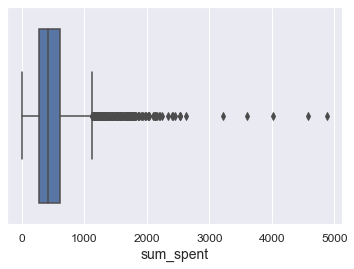

In [21]:
sns.boxplot(x=credit_card['sum_spent'])

In [22]:
sum_outliers = credit_card['sum_spent']

In [23]:
# Handling Outliers for numerical data
test1 = sum_outliers[sum_outliers.between(sum_outliers.quantile(.01), sum_outliers.quantile(.99))] 

<AxesSubplot:xlabel='sum_spent'>

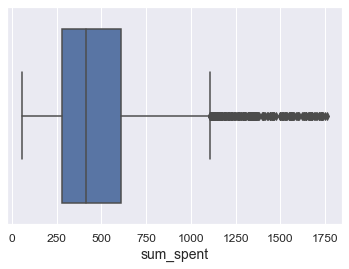

In [24]:
sns.boxplot(x=test1)

In [25]:
 df_num['sum_spent'] = test1

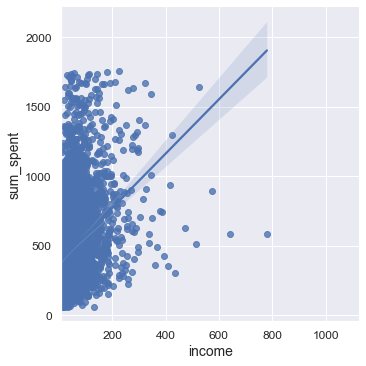

In [26]:
sns.lmplot(x="income", y="sum_spent", data=df_num);

### 3.4 Handle Missing Values

#### As we can see in the above summary report some data is missing in the numerical data set and some are missing in categorical.
#### We will treat numerical missing data with mean() and categorical data with mode()

In [27]:
# Handling missing numerical data - by Function (Make the function to treat all data in one shot)
df_num_updated=df_num.fillna(df_num.median())

In [28]:
df_num_updated.isnull().sum()

age               0
ed                0
income            0
lninc             0
debtinc           0
creddebt          0
lncreddebt        0
othdebt           0
lnothdebt         0
spoused           0
reside            0
pets              0
pets_cats         0
pets_dogs         0
pets_birds        0
pets_reptiles     0
pets_small        0
pets_saltfish     0
pets_freshfish    0
carvalue          0
commutetime       0
tenure            0
longmon           0
lnlongmon         0
longten           0
lnlongten         0
tollmon           0
lntollmon         0
tollten           0
lntollten         0
equipmon          0
lnequipmon        0
equipten          0
lnequipten        0
cardmon           0
lncardmon         0
cardten           0
lncardten         0
wiremon           0
lnwiremon         0
wireten           0
lnwireten         0
hourstv           0
sum_spent         0
dtype: int64

In [155]:
df_num_updated

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,carvalue,commutetime,tenure,longmon,lnlongmon,longten,lnlongten,tollmon,lntollmon,tollten,lntollten,equipmon,lnequipmon,equipten,lnequipten,cardmon,lncardmon,cardten,lncardten,wiremon,lnwiremon,wireten,lnwireten,hourstv,sum_spent
0,20,15,31,3.433987,11.1,1.200909,0.183079,2.240091,0.806516,-1,3,0,0,0,0,0,0,0,0,14.3,22.0,5,6.50,1.871802,34.40,3.538057,29.0,3.367296,161.05,5.081715,29.50,3.384390,126.10,4.837075,14.25,2.656757,60.0,4.094345,0.00,3.597997,0.00,7.147185,13,149.46
1,22,17,15,2.708050,18.6,1.222020,0.200505,1.567980,0.449788,-1,2,6,0,0,0,0,0,0,6,6.8,29.0,39,8.90,2.186051,330.60,5.800909,0.0,3.228826,0.00,6.858013,54.85,4.004602,1975.00,7.588324,16.00,2.772589,610.0,6.413459,45.65,3.821004,1683.55,7.428660,18,77.54
2,67,14,35,3.555348,9.9,0.928620,-0.074056,2.536380,0.930738,13,3,3,2,1,0,0,0,0,0,18.8,24.0,65,28.40,3.346389,1858.35,7.527444,0.0,3.228826,0.00,6.858013,0.00,3.598681,0.00,7.050556,23.00,3.135494,1410.0,7.251345,0.00,3.597997,0.00,7.147185,21,359.97
3,23,16,20,2.995732,5.7,0.022800,-3.780995,1.117200,0.110826,18,5,0,0,0,0,0,0,0,0,8.7,38.0,36,6.00,1.791759,199.45,5.295564,0.0,3.228826,0.00,6.858013,0.00,3.598681,0.00,7.050556,21.00,3.044522,685.0,6.529419,0.00,3.597997,0.00,7.147185,26,359.41
4,26,16,23,3.135494,1.7,0.214659,-1.538705,0.176341,-1.735336,13,4,0,0,0,0,0,0,0,0,10.6,32.0,21,3.05,1.115142,74.10,4.305416,16.5,2.803360,387.70,5.960232,0.00,3.598681,0.00,7.050556,17.25,2.847812,360.0,5.886104,19.05,2.947067,410.80,6.018106,27,507.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,68,10,196,5.278115,8.0,7.934080,2.071167,7.745920,2.047166,-1,1,4,4,0,0,0,0,0,0,64.5,21.0,69,34.10,3.529297,2405.90,7.785679,0.0,3.228826,0.00,6.858013,0.00,3.598681,0.00,7.050556,21.75,3.079614,1565.0,7.355641,0.00,3.597997,0.00,7.147185,19,1425.67
4996,51,14,83,4.418841,15.0,3.336600,1.204952,9.113400,2.209746,-1,1,1,0,0,0,0,0,0,1,40.0,26.0,30,10.40,2.341806,289.00,5.666427,36.5,3.597312,1157.20,7.053759,0.00,3.598681,0.00,7.050556,26.25,3.267666,800.0,6.684612,27.90,3.328627,757.35,6.629825,14,366.35
4997,75,17,108,4.682131,10.8,3.557520,1.269064,8.106480,2.092664,-1,1,0,0,0,0,0,0,0,0,53.6,32.0,72,29.40,3.380995,2109.25,7.654088,44.0,3.784190,3322.50,8.108473,0.00,3.598681,0.00,7.050556,15.25,2.724580,1070.0,6.975414,0.00,3.597997,0.00,7.147185,16,1527.75
4998,47,19,189,5.241747,10.8,5.021352,1.613699,15.390648,2.733760,15,4,0,0,0,0,0,0,0,0,96.0,12.0,37,7.95,2.073172,282.70,5.644386,0.0,3.228826,0.00,6.858013,29.55,3.386084,1032.85,6.940077,9.50,2.251292,345.0,5.843544,0.00,3.597997,0.00,7.147185,24,752.95


In [156]:
df_cat=credit_card[categorical]

In [157]:
# Handling missing categorical data - by Function (Make the function to treat all data in one shot)
df_cat_updated=df_cat.fillna(df_cat.mode().iloc[0])

In [158]:
df_cat.isnull().sum()

region         0
townsize       2
gender         0
agecat         0
edcat          0
              ..
ownfax         0
news           0
response_01    0
response_02    0
response_03    0
Length: 83, dtype: int64

In [33]:
df_cat[df_cat.isnull().any(axis=1)]

,region,townsize,gender,agecat,edcat,jobcat,union,employ,empcat,retire,inccat,default,jobsat,marital,spousedcat,homeown,hometype,address,addresscat,cars,carown,cartype,carcatvalue,carbought,carbuy,commute,commutecat,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,active,bfast,churn,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
961,1,NaN,1,4,4,3,0,12,4,0,4,0,5,0,-1,1,1,8,3,0,-1,-1,-1,-1,1,4,3,0,0,0,1,1,0,0,0,0,0,9,5,1,0,1,4,3,2,0,4,2,3,3,4,0,4,2,1,3,1,1,1,1,1,1,1,1,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0
2731,5,NaN,1,6,3,6,0,20,5,1,1,0,3,1,2,1,1,37,5,1,1,1,1,0,0,4,3,0,0,0,1,0,0,0,0,0,0,9,4,0,0,0,5,3,2,0,10,3,2,2,3,0,7,3,1,3,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0


In [159]:
df_cat_updated.iloc[2731]

region         5.0
townsize       1.0
gender         1.0
agecat         6.0
edcat          3.0
              ... 
ownfax         0.0
news           0.0
response_01    0.0
response_02    0.0
response_03    0.0
Name: 2731, Length: 83, dtype: float64

In [35]:
df_cat.mode()

,region,townsize,gender,agecat,edcat,jobcat,union,employ,empcat,retire,inccat,default,jobsat,marital,spousedcat,homeown,hometype,address,addresscat,cars,carown,cartype,carcatvalue,carbought,carbuy,commute,commutecat,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,active,bfast,churn,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,5,1.0,1,4,2,2,0,0,2,0,2,0,3,0,-1,1,1,0,3,2,1,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,9,4,0,0,1,4,4,3,0,3,5,3,4,4,0,2,5,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0


In [160]:
df_cat_updated.isnull().sum()

region         0
townsize       0
gender         0
agecat         0
edcat          0
              ..
ownfax         0
news           0
response_01    0
response_02    0
response_03    0
Length: 83, dtype: int64

In [161]:
#the categorical columns before dummy 
df_final_cat = df_cat_updated

#### Again check missing values to make sure they have been treated or not

In [37]:
# Find the total number of missing values in the numerical data i.e custdata_df_num
for col_name in df_num_updated.columns: 
    print ("column:",col_name,".Missing:",sum(df_num_updated[col_name].isnull()))

column: age .Missing: 0
column: ed .Missing: 0
column: income .Missing: 0
column: lninc .Missing: 0
column: debtinc .Missing: 0
column: creddebt .Missing: 0
column: lncreddebt .Missing: 0
column: othdebt .Missing: 0
column: lnothdebt .Missing: 0
column: spoused .Missing: 0
column: reside .Missing: 0
column: pets .Missing: 0
column: pets_cats .Missing: 0
column: pets_dogs .Missing: 0
column: pets_birds .Missing: 0
column: pets_reptiles .Missing: 0
column: pets_small .Missing: 0
column: pets_saltfish .Missing: 0
column: pets_freshfish .Missing: 0
column: carvalue .Missing: 0
column: commutetime .Missing: 0
column: tenure .Missing: 0
column: longmon .Missing: 0
column: lnlongmon .Missing: 0
column: longten .Missing: 0
column: lnlongten .Missing: 0
column: tollmon .Missing: 0
column: lntollmon .Missing: 0
column: tollten .Missing: 0
column: lntollten .Missing: 0
column: equipmon .Missing: 0
column: lnequipmon .Missing: 0
column: equipten .Missing: 0
column: lnequipten .Missing: 0
column: c

In [38]:
# Find the total number of missing values in the numerical data i.e custdata_df_num
for col_name in df_cat_updated.columns: 
    print ("column:",col_name,".Missing:",sum(df_cat_updated[col_name].isnull()))

column: region .Missing: 0
column: townsize .Missing: 0
column: gender .Missing: 0
column: agecat .Missing: 0
column: edcat .Missing: 0
column: jobcat .Missing: 0
column: union .Missing: 0
column: employ .Missing: 0
column: empcat .Missing: 0
column: retire .Missing: 0
column: inccat .Missing: 0
column: default .Missing: 0
column: jobsat .Missing: 0
column: marital .Missing: 0
column: spousedcat .Missing: 0
column: homeown .Missing: 0
column: hometype .Missing: 0
column: address .Missing: 0
column: addresscat .Missing: 0
column: cars .Missing: 0
column: carown .Missing: 0
column: cartype .Missing: 0
column: carcatvalue .Missing: 0
column: carbought .Missing: 0
column: carbuy .Missing: 0
column: commute .Missing: 0
column: commutecat .Missing: 0
column: commutecar .Missing: 0
column: commutemotorcycle .Missing: 0
column: commutecarpool .Missing: 0
column: commutebus .Missing: 0
column: commuterail .Missing: 0
column: commutepublic .Missing: 0
column: commutebike .Missing: 0
column: comm

### 3.5 Dummy creation for categorical data

In [39]:
# We need to create a function for dummy creation
# https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname)
    col_dummies.drop(col_dummies.columns[0], axis = 1, inplace = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True)
    return df

In [40]:
# Get categorical variables as a list
# cat_varlist
categorical

['region',
 'townsize',
 'gender',
 'agecat',
 'edcat',
 'jobcat',
 'union',
 'employ',
 'empcat',
 'retire',
 'inccat',
 'default',
 'jobsat',
 'marital',
 'spousedcat',
 'homeown',
 'hometype',
 'address',
 'addresscat',
 'cars',
 'carown',
 'cartype',
 'carcatvalue',
 'carbought',
 'carbuy',
 'commute',
 'commutecat',
 'commutecar',
 'commutemotorcycle',
 'commutecarpool',
 'commutebus',
 'commuterail',
 'commutepublic',
 'commutebike',
 'commutewalk',
 'commutenonmotor',
 'telecommute',
 'reason',
 'polview',
 'polparty',
 'polcontrib',
 'vote',
 'card',
 'cardtype',
 'cardbenefit',
 'cardfee',
 'cardtenure',
 'cardtenurecat',
 'card2',
 'card2type',
 'card2benefit',
 'card2fee',
 'card2tenure',
 'card2tenurecat',
 'active',
 'bfast',
 'churn',
 'tollfree',
 'equip',
 'callcard',
 'wireless',
 'multline',
 'voice',
 'pager',
 'internet',
 'callid',
 'callwait',
 'forward',
 'confer',
 'ebill',
 'owntv',
 'ownvcr',
 'owndvd',
 'owncd',
 'ownpda',
 'ownpc',
 'ownipod',
 'owngame',
 '

In [42]:
# For customer_features in categorical features
# test3=create_dummies(df_cat_updated, 'region')
# df_cat=df_cat_updated.select_dtypes(include=['object'])
#     test3=create_dummies(df_cat_updated, list(df_cat_updated.columns))

for i in list(df_cat_updated.columns):
    df_cat_updated[i]=df_cat_updated[i].astype('category')
    df_cat_updated=create_dummies(df_cat_updated,i)
    

In [43]:
df_cat_updated.iloc[1189]

region_2         0
region_3         0
region_4         1
region_5         0
townsize_2.0     1
                ..
ownfax_1         1
news_1           0
response_01_1    0
response_02_1    0
response_03_1    0
Name: 1189, Length: 345, dtype: uint8

In [44]:
df_cat_updated

,region_2,region_3,region_4,region_5,townsize_2.0,townsize_3.0,townsize_4.0,townsize_5.0,gender_1,agecat_3,agecat_4,agecat_5,agecat_6,edcat_2,edcat_3,edcat_4,edcat_5,jobcat_2,jobcat_3,jobcat_4,jobcat_5,jobcat_6,union_1,employ_1,employ_2,employ_3,employ_4,employ_5,employ_6,employ_7,employ_8,employ_9,employ_10,employ_11,employ_12,employ_13,employ_14,employ_15,employ_16,employ_17,employ_18,employ_19,employ_20,employ_21,employ_22,employ_23,employ_24,employ_25,employ_26,employ_27,employ_28,employ_29,employ_30,employ_31,employ_32,employ_33,employ_34,employ_35,employ_36,employ_37,employ_38,employ_39,employ_40,employ_41,employ_42,employ_43,employ_44,employ_45,employ_46,employ_47,employ_48,employ_49,employ_51,employ_52,empcat_2,empcat_3,empcat_4,empcat_5,retire_1,inccat_2,inccat_3,inccat_4,inccat_5,default_1,jobsat_2,jobsat_3,jobsat_4,jobsat_5,marital_1,spousedcat_1,spousedcat_2,spousedcat_3,spousedcat_4,spousedcat_5,homeown_1,hometype_2,hometype_3,hometype_4,address_1,address_2,address_3,address_4,address_5,address_6,address_7,address_8,address_9,address_10,address_11,address_12,address_13,address_14,address_15,address_16,address_17,address_18,address_19,address_20,address_21,address_22,address_23,address_24,address_25,address_26,address_27,address_28,address_29,address_30,address_31,address_32,address_33,address_34,address_35,address_36,address_37,address_38,address_39,address_40,address_41,address_42,address_43,address_44,address_45,address_46,address_47,address_48,address_49,address_50,address_51,address_52,address_53,address_54,address_55,address_57,addresscat_2,addresscat_3,addresscat_4,addresscat_5,cars_1,cars_2,cars_3,cars_4,cars_5,cars_6,cars_7,cars_8,carown_0,carown_1,cartype_0,cartype_1,carcatvalue_1,carcatvalue_2,carcatvalue_3,carbought_0,carbought_1,carbuy_1,commute_2,commute_3,commute_4,commute_5,commute_6,commute_7,commute_8,commute_9,commute_10,commutecat_2,commutecat_3,commutecat_4,commutecat_5,commutecar_1,commutemotorcycle_1,commutecarpool_1,commutebus_1,commuterail_1,commutepublic_1,commutebike_1,commutewalk_1,commutenonmotor_1,telecommute_1,reason_2,reason_3,reason_4,reason_9,polview_2,polview_3,polview_4,polview_5,polview_6,polview_7,polparty_1,polcontrib_1,vote_1,card_2,card_3,card_4,card_5,cardtype_2,cardtype_3,cardtype_4,cardbenefit_2,cardbenefit_3,cardbenefit_4,cardfee_1,cardtenure_1,cardtenure_2,cardtenure_3,cardtenure_4,cardtenure_5,cardtenure_6,cardtenure_7,cardtenure_8,cardtenure_9,cardtenure_10,cardtenure_11,cardtenure_12,cardtenure_13,cardtenure_14,cardtenure_15,cardtenure_16,cardtenure_17,cardtenure_18,cardtenure_19,cardtenure_20,cardtenure_21,cardtenure_22,cardtenure_23,cardtenure_24,cardtenure_25,cardtenure_26,cardtenure_27,cardtenure_28,cardtenure_29,cardtenure_30,cardtenure_31,cardtenure_32,cardtenure_33,cardtenure_34,cardtenure_35,cardtenure_36,cardtenure_37,cardtenure_38,cardtenure_39,cardtenure_40,cardtenurecat_2,cardtenurecat_3,cardtenurecat_4,cardtenurecat_5,card2_2,card2_3,card2_4,card2_5,card2type_2,card2type_3,card2type_4,card2benefit_2,card2benefit_3,card2benefit_4,card2fee_1,card2tenure_1,card2tenure_2,card2tenure_3,card2tenure_4,card2tenure_5,card2tenure_6,card2tenure_7,card2tenure_8,card2tenure_9,card2tenure_10,card2tenure_11,card2tenure_12,card2tenure_13,card2tenure_14,card2tenure_15,card2tenure_16,card2tenure_17,card2tenure_18,card2tenure_19,card2tenure_20,card2tenure_21,card2tenure_22,card2tenure_23,card2tenure_24,card2tenure_25,card2tenure_26,card2tenure_27,card2tenure_28,card2tenure_29,card2tenure_30,card2tenurecat_2,card2tenurecat_3,card2tenurecat_4,card2tenurecat_5,active_1,bfast_2,bfast_3,churn_1,tollfree_1,equip_1,callcard_1,wireless_1,multline_1,voice_1,pager_1,internet_1,internet_2,internet_3,internet_4,callid_1,callwait_1,forward_1,confer_1,ebill_1,owntv_1,ownvcr_1,owndvd_1,owncd_1,ownpda_1,ownpc_1,ownipod_1,owngame_1,ownfax_1,news_1,response_01_1,response_02_1,response_03_1
0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [47]:
# Display some of the categorical features and their values

,region_2,region_3,region_4,region_5,townsize_2.0,townsize_3.0,townsize_4.0,townsize_5.0,gender_1,agecat_3,agecat_4,agecat_5,agecat_6,birthmonth_August,birthmonth_December,birthmonth_February,birthmonth_January,birthmonth_July,birthmonth_June,birthmonth_March,birthmonth_May,birthmonth_November,birthmonth_October,birthmonth_September,edcat_2,edcat_3,edcat_4,edcat_5,jobcat_2,jobcat_3,jobcat_4,jobcat_5,jobcat_6,union_1,employ_1,employ_2,employ_3,employ_4,employ_5,employ_6,employ_7,employ_8,employ_9,employ_10,employ_11,employ_12,employ_13,employ_14,employ_15,employ_16,employ_17,employ_18,employ_19,employ_20,employ_21,employ_22,employ_23,employ_24,employ_25,employ_26,employ_27,employ_28,employ_29,employ_30,employ_31,employ_32,employ_33,employ_34,employ_35,employ_36,employ_37,employ_38,employ_39,employ_40,employ_41,employ_42,employ_43,employ_44,employ_45,employ_46,employ_47,employ_48,employ_49,employ_51,employ_52,empcat_2,empcat_3,empcat_4,empcat_5,retire_1,inccat_2,inccat_3,inccat_4,inccat_5,default_1,jobsat_2,jobsat_3,jobsat_4,jobsat_5,marital_1,spousedcat_1,spousedcat_2,spousedcat_3,spousedcat_4,spousedcat_5,homeown_1,hometype_2,hometype_3,hometype_4,address_1,address_2,address_3,address_4,address_5,address_6,address_7,address_8,address_9,address_10,address_11,address_12,address_13,address_14,address_15,address_16,address_17,address_18,address_19,address_20,address_21,address_22,address_23,address_24,address_25,address_26,address_27,address_28,address_29,address_30,address_31,address_32,address_33,address_34,address_35,address_36,address_37,address_38,address_39,address_40,address_41,address_42,address_43,address_44,address_45,address_46,address_47,address_48,address_49,address_50,address_51,address_52,address_53,address_54,address_55,address_57,addresscat_2,addresscat_3,addresscat_4,addresscat_5,cars_1,cars_2,cars_3,cars_4,cars_5,cars_6,cars_7,cars_8,carown_0,carown_1,cartype_0,cartype_1,carcatvalue_1,carcatvalue_2,carcatvalue_3,carbought_0,carbought_1,carbuy_1,commute_2,commute_3,commute_4,commute_5,commute_6,commute_7,commute_8,commute_9,commute_10,commutecat_2,commutecat_3,commutecat_4,commutecat_5,commutecar_1,commutemotorcycle_1,commutecarpool_1,commutebus_1,commuterail_1,commutepublic_1,commutebike_1,commutewalk_1,commutenonmotor_1,telecommute_1,reason_2,reason_3,reason_4,reason_9,polview_2,polview_3,polview_4,polview_5,polview_6,polview_7,polparty_1,polcontrib_1,vote_1,card_2,card_3,card_4,card_5,cardtype_2,cardtype_3,cardtype_4,cardbenefit_2,cardbenefit_3,cardbenefit_4,cardfee_1,cardtenure_1,cardtenure_2,cardtenure_3,cardtenure_4,cardtenure_5,cardtenure_6,cardtenure_7,cardtenure_8,cardtenure_9,cardtenure_10,cardtenure_11,cardtenure_12,cardtenure_13,cardtenure_14,cardtenure_15,cardtenure_16,cardtenure_17,cardtenure_18,cardtenure_19,cardtenure_20,cardtenure_21,cardtenure_22,cardtenure_23,cardtenure_24,cardtenure_25,cardtenure_26,cardtenure_27,cardtenure_28,cardtenure_29,cardtenure_30,cardtenure_31,cardtenure_32,cardtenure_33,cardtenure_34,cardtenure_35,cardtenure_36,cardtenure_37,cardtenure_38,cardtenure_39,cardtenure_40,cardtenurecat_2,cardtenurecat_3,cardtenurecat_4,cardtenurecat_5,card2_2,card2_3,card2_4,card2_5,card2type_2,card2type_3,card2type_4,card2benefit_2,card2benefit_3,card2benefit_4,card2fee_1,card2tenure_1,card2tenure_2,card2tenure_3,card2tenure_4,card2tenure_5,card2tenure_6,card2tenure_7,card2tenure_8,card2tenure_9,card2tenure_10,card2tenure_11,card2tenure_12,card2tenure_13,card2tenure_14,card2tenure_15,card2tenure_16,card2tenure_17,card2tenure_18,card2tenure_19,card2tenure_20,card2tenure_21,card2tenure_22,card2tenure_23,card2tenure_24,card2tenure_25,card2tenure_26,card2tenure_27,card2tenure_28,card2tenure_29,card2tenure_30,card2tenurecat_2,card2tenurecat_3,card2tenurecat_4,card2tenurecat_5,active_1,bfast_2,bfast_3,churn_1,tollfree_1,equip_1,callcard_1,wireless_1,multline_1,voice_1,pager_1,internet_1,internet_2,internet_3,internet_4,callid_1,callwait_1,forward_1,confer_1,ebill_1,owntv_1,ownvcr_1,owndvd_1,ownc

### 3.6 Merge Numerical and Categorical data

***Now we have clean data for numerical and categorical data frames, so we can merge both data sets***

In [45]:
df_credit = pd.concat([df_cat_updated, df_num_updated], axis=1)


In [46]:
df_credit

,region_2,region_3,region_4,region_5,townsize_2.0,townsize_3.0,townsize_4.0,townsize_5.0,gender_1,agecat_3,agecat_4,agecat_5,agecat_6,edcat_2,edcat_3,edcat_4,edcat_5,jobcat_2,jobcat_3,jobcat_4,jobcat_5,jobcat_6,union_1,employ_1,employ_2,employ_3,employ_4,employ_5,employ_6,employ_7,employ_8,employ_9,employ_10,employ_11,employ_12,employ_13,employ_14,employ_15,employ_16,employ_17,employ_18,employ_19,employ_20,employ_21,employ_22,employ_23,employ_24,employ_25,employ_26,employ_27,employ_28,employ_29,employ_30,employ_31,employ_32,employ_33,employ_34,employ_35,employ_36,employ_37,employ_38,employ_39,employ_40,employ_41,employ_42,employ_43,employ_44,employ_45,employ_46,employ_47,employ_48,employ_49,employ_51,employ_52,empcat_2,empcat_3,empcat_4,empcat_5,retire_1,inccat_2,inccat_3,inccat_4,inccat_5,default_1,jobsat_2,jobsat_3,jobsat_4,jobsat_5,marital_1,spousedcat_1,spousedcat_2,spousedcat_3,spousedcat_4,spousedcat_5,homeown_1,hometype_2,hometype_3,hometype_4,address_1,address_2,address_3,address_4,address_5,address_6,address_7,address_8,address_9,address_10,address_11,address_12,address_13,address_14,address_15,address_16,address_17,address_18,address_19,address_20,address_21,address_22,address_23,address_24,address_25,address_26,address_27,address_28,address_29,address_30,address_31,address_32,address_33,address_34,address_35,address_36,address_37,address_38,address_39,address_40,address_41,address_42,address_43,address_44,address_45,address_46,address_47,address_48,address_49,address_50,address_51,address_52,address_53,address_54,address_55,address_57,addresscat_2,addresscat_3,addresscat_4,addresscat_5,cars_1,cars_2,cars_3,cars_4,cars_5,cars_6,cars_7,cars_8,carown_0,carown_1,cartype_0,cartype_1,carcatvalue_1,carcatvalue_2,carcatvalue_3,carbought_0,carbought_1,carbuy_1,commute_2,commute_3,commute_4,commute_5,commute_6,commute_7,commute_8,commute_9,commute_10,commutecat_2,commutecat_3,commutecat_4,commutecat_5,commutecar_1,commutemotorcycle_1,commutecarpool_1,commutebus_1,commuterail_1,commutepublic_1,commutebike_1,commutewalk_1,commutenonmotor_1,telecommute_1,reason_2,reason_3,reason_4,reason_9,polview_2,polview_3,polview_4,polview_5,polview_6,polview_7,polparty_1,polcontrib_1,vote_1,card_2,card_3,card_4,card_5,cardtype_2,cardtype_3,cardtype_4,cardbenefit_2,cardbenefit_3,cardbenefit_4,cardfee_1,cardtenure_1,cardtenure_2,cardtenure_3,cardtenure_4,cardtenure_5,cardtenure_6,cardtenure_7,cardtenure_8,cardtenure_9,cardtenure_10,cardtenure_11,cardtenure_12,cardtenure_13,cardtenure_14,cardtenure_15,cardtenure_16,cardtenure_17,cardtenure_18,cardtenure_19,cardtenure_20,cardtenure_21,cardtenure_22,cardtenure_23,cardtenure_24,cardtenure_25,cardtenure_26,cardtenure_27,cardtenure_28,cardtenure_29,cardtenure_30,cardtenure_31,cardtenure_32,cardtenure_33,cardtenure_34,cardtenure_35,cardtenure_36,cardtenure_37,cardtenure_38,cardtenure_39,cardtenure_40,cardtenurecat_2,cardtenurecat_3,cardtenurecat_4,cardtenurecat_5,card2_2,card2_3,card2_4,card2_5,card2type_2,card2type_3,card2type_4,card2benefit_2,card2benefit_3,card2benefit_4,card2fee_1,card2tenure_1,card2tenure_2,card2tenure_3,card2tenure_4,card2tenure_5,card2tenure_6,card2tenure_7,card2tenure_8,card2tenure_9,card2tenure_10,card2tenure_11,card2tenure_12,card2tenure_13,card2tenure_14,card2tenure_15,card2tenure_16,card2tenure_17,card2tenure_18,card2tenure_19,card2tenure_20,card2tenure_21,card2tenure_22,card2tenure_23,card2tenure_24,card2tenure_25,card2tenure_26,card2tenure_27,card2tenure_28,card2tenure_29,card2tenure_30,card2tenurecat_2,card2tenurecat_3,card2tenurecat_4,card2tenurecat_5,active_1,bfast_2,bfast_3,churn_1,tollfree_1,equip_1,callcard_1,wireless_1,multline_1,voice_1,pager_1,internet_1,internet_2,internet_3,internet_4,callid_1,callwait_1,forward_1,confer_1,ebill_1,owntv_1,ownvcr_1,owndvd_1,owncd_1,ownpda_1,ownpc_1,ownipod_1,owngame_1,ownfax_1,news_1,response_01_1,response_02_1,response_03_1,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,reside,pets,pets_cats,pets_d

In [163]:
#combine data frame of categorical (without dummy) and numerical
df_creditdata = pd.concat([df_final_cat, df_num_updated], axis=1)

In [164]:
df_creditdata.head()

,region,townsize,gender,agecat,edcat,jobcat,union,employ,empcat,retire,inccat,default,jobsat,marital,spousedcat,homeown,hometype,address,addresscat,cars,carown,cartype,carcatvalue,carbought,carbuy,commute,commutecat,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,active,bfast,churn,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,carvalue,commutetime,tenure,longmon,lnlongmon,longten,lnlongten,tollmon,lntollmon,tollten,lntollten,equipmon,lnequipmon,equipten,lnequipten,cardmon,lncardmon,cardten,lncardten,wiremon,lnwiremon,wireten,lnwireten,hourstv,sum_spent
0,1,2.0,1,2,3,1,1,0,1,0,2,1,1,0,-1,0,2,0,1,2,1,0,1,0,0,8,4,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,0,3,1,1,1,1,0,1,1,1,0,0,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1,0,20,15,31,3.433987,11.1,1.200909,0.183079,2.240091,0.806516,-1,3,0,0,0,0,0,0,0,0,14.3,22.0,5,6.50,1.871802,34.40,3.538057,29.0,3.367296,161.05,5.081715,29.50,3.384390,126.1,4.837075,14.25,2.656757,60.0,4.094345,0.00,3.597997,0.00,7.147185,13,149.46
1,5,5.0,0,2,4,2,0,0,1,0,1,1,1,0,-1,1,3,2,1,2,1,1,1,0,0,1,1,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,2,4,1,3,0,4,2,1,1,0,0,1,1,1,1,1,1,4,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,22,17,15,2.708050,18.6,1.222020,0.200505,1.567980,0.449788,-1,2,6,0,0,0,0,0,0,6,6.8,29.0,39,8.90,2.186051,330.60,5.800909,0.0,3.228826,0.00,6.858013,54.85,4.004602,1975.0,7.588324,16.00,2.772589,610.0,6.413459,45.65,3.821004,1683.55,7.428660,18,77.54
2,3,4.0,1,6,2,2,0,16,5,0,2,0,4,1,2,1,1,30,5,3,1,1,1,0,1,4,3,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,35,5,4,1,3,0,25,5,0,3,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,67,14,35,3.555348,9.9,0.928620,-0.074056,2.536380,0.930738,13,3,3,2,1,0,0,0,0,0,18.8,24.0,65,28.40,3.346389,1858.35,7.527444,0.0,3.228826,0.00,6.858013,0.00,3.598681,0.0,7.050556,23.00,3.135494,1410.0,7.251345,0.00,3.597997,0.00,7.147185,21,359.97
3,4,3.0,0,2,3,2,0,0,1,0,1,1,2,1,4,1,3,3,2,3,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,5,2,3,2,4,0,5,2,1,1,0,0,0,1,0,1,0,0,2,0,0,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,0,23,16,20,2.995732,5.7,0.022800,-3.780995,1.117200,0.110826,18,5,0,0,0,0,0,0,0,0,8.7,38.0,36,6.00,1.791759,199.45,5.295564,0.0,3.228826,0.00,6.858013,0.00,3.598681,0.0,7.050556,21.00,3.044522,685.0,6.529419,0.00,3.597997,0.00,7.147185,26,359.41
4,2,2.0,0,3,3,2,0,1,1,0,1,0,1,1,2,0,2,3,2,1,0,1,1,0,1,6,3,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,8,3,1,3,2,0,9,3,1,3,0,1,0,1,1,0,1,0,3,1,1,1,1,0,1,1,1,1,0,1,0,1,0,0,0,1,0,26,16,23,3.135494,1.7,0.214659,-1.538705,0.176341,-1.735336,13,4,0,0,0,0,0,0,0,0,10.6,32.0,21,3.05,1.115142,74.10,4.305416,16.5,2.803360,387.70,5.960232,0.00,3.598681,0.0,7.050556,17.25,2.847812,360.0,5.886104,19.05,2.947067,410.80,6.018106,27,507.83


In [49]:
# Display the combined data frame


,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,carvalue,commutetime,tenure,longmon,lnlongmon,longten,lnlongten,tollmon,lntollmon,tollten,lntollten,equipmon,lnequipmon,equipten,lnequipten,cardmon,lncardmon,cardten,lncardten,wiremon,lnwiremon,wireten,lnwireten,hourstv,totalspend,region_2,region_3,region_4,region_5,townsize_2.0,townsize_3.0,townsize_4.0,townsize_5.0,gender_1,agecat_3,agecat_4,agecat_5,agecat_6,birthmonth_August,birthmonth_December,birthmonth_February,birthmonth_January,birthmonth_July,birthmonth_June,birthmonth_March,birthmonth_May,birthmonth_November,birthmonth_October,birthmonth_September,edcat_2,edcat_3,edcat_4,edcat_5,jobcat_2,jobcat_3,jobcat_4,jobcat_5,jobcat_6,union_1,employ_1,employ_2,employ_3,employ_4,employ_5,employ_6,employ_7,employ_8,employ_9,employ_10,employ_11,employ_12,employ_13,employ_14,employ_15,employ_16,employ_17,employ_18,employ_19,employ_20,employ_21,employ_22,employ_23,employ_24,employ_25,employ_26,employ_27,employ_28,employ_29,employ_30,employ_31,employ_32,employ_33,employ_34,employ_35,employ_36,employ_37,employ_38,employ_39,employ_40,employ_41,employ_42,employ_43,employ_44,employ_45,employ_46,employ_47,employ_48,employ_49,employ_51,employ_52,empcat_2,empcat_3,empcat_4,empcat_5,retire_1,inccat_2,inccat_3,inccat_4,inccat_5,default_1,jobsat_2,jobsat_3,jobsat_4,jobsat_5,marital_1,spousedcat_1,spousedcat_2,spousedcat_3,spousedcat_4,spousedcat_5,homeown_1,hometype_2,hometype_3,hometype_4,address_1,address_2,address_3,address_4,address_5,address_6,address_7,address_8,address_9,address_10,address_11,address_12,address_13,address_14,address_15,address_16,address_17,address_18,address_19,address_20,address_21,address_22,address_23,address_24,address_25,address_26,address_27,address_28,address_29,address_30,address_31,address_32,address_33,address_34,address_35,address_36,address_37,address_38,address_39,address_40,address_41,address_42,address_43,address_44,address_45,address_46,address_47,address_48,address_49,address_50,address_51,address_52,address_53,address_54,address_55,address_57,addresscat_2,addresscat_3,addresscat_4,addresscat_5,cars_1,cars_2,cars_3,cars_4,cars_5,cars_6,cars_7,cars_8,carown_0,carown_1,cartype_0,cartype_1,carcatvalue_1,carcatvalue_2,carcatvalue_3,carbought_0,carbought_1,carbuy_1,commute_2,commute_3,commute_4,commute_5,commute_6,commute_7,commute_8,commute_9,commute_10,commutecat_2,commutecat_3,commutecat_4,commutecat_5,commutecar_1,commutemotorcycle_1,commutecarpool_1,commutebus_1,commuterail_1,commutepublic_1,commutebike_1,commutewalk_1,commutenonmotor_1,telecommute_1,reason_2,reason_3,reason_4,reason_9,polview_2,polview_3,polview_4,polview_5,polview_6,polview_7,polparty_1,polcontrib_1,vote_1,card_2,card_3,card_4,card_5,cardtype_2,cardtype_3,cardtype_4,cardbenefit_2,cardbenefit_3,cardbenefit_4,cardfee_1,cardtenure_1,cardtenure_2,cardtenure_3,cardtenure_4,cardtenure_5,cardtenure_6,cardtenure_7,cardtenure_8,cardtenure_9,cardtenure_10,cardtenure_11,cardtenure_12,cardtenure_13,cardtenure_14,cardtenure_15,cardtenure_16,cardtenure_17,cardtenure_18,cardtenure_19,cardtenure_20,cardtenure_21,cardtenure_22,cardtenure_23,cardtenure_24,cardtenure_25,cardtenure_26,cardtenure_27,cardtenure_28,cardtenure_29,cardtenure_30,cardtenure_31,cardtenure_32,cardtenure_33,cardtenure_34,cardtenure_35,cardtenure_36,cardtenure_37,cardtenure_38,cardtenure_39,cardtenure_40,cardtenurecat_2,cardtenurecat_3,cardtenurecat_4,cardtenurecat_5,card2_2,card2_3,card2_4,card2_5,card2type_2,card2type_3,card2type_4,card2benefit_2,card2benefit_3,card2benefit_4,card2fee_1,card2tenure_1,card2tenure_2,card2tenure_3,card2tenure_4,card2tenure_5,card2tenure_6,card2tenure_7,card2tenure_8,card2tenure_9,card2tenure_10,card2tenure_11,card2tenure_12,card2tenure_13,card2tenure_14,card2tenure_15,card2tenure_16,card2tenure_17,card2tenure_18,card2tenure_19,card2tenure_20,card2tenure_21,card2tenure_22,card2ten

In [47]:
df_credit.shape

(5000, 389)

## 4 Exploratory Data Analysis

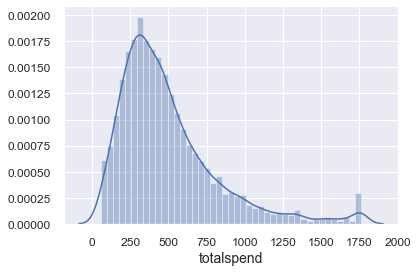

In [53]:
# Examine the distribution of totalspend


<AxesSubplot:xlabel='sum_spent', ylabel='Density'>

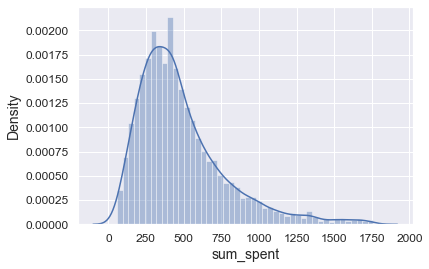

In [48]:
sns.distplot(df_credit['sum_spent'])

In [49]:
df_credit['sum_spent'].describe()

count    5000.000000
mean      483.537286
std       293.737798
min        58.200000
25%       281.972500
50%       414.250000
75%       605.140000
max      1760.010000
Name: sum_spent, dtype: float64

### Is the distribution skewed? Which direction? Try taking the log and seeing the result

yes. it is skewed to the right.

***As we can see above graph our data is not distributed normally perfectly, so we will use boxcox techniue to make it perfect normal***

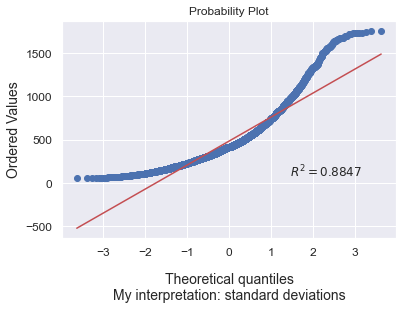

In [50]:
stats.probplot(df_credit['sum_spent'], dist="norm", fit=True, rvalue=True, plot=plt)
plt.xlabel("Theoretical quantiles\nMy interpretation: standard deviations", labelpad=15)
plt.show()

In [51]:
df_credit['bc_sum_spent'], fitted_lambda = stats.boxcox(df_credit['sum_spent'])

<AxesSubplot:xlabel='bc_sum_spent', ylabel='Density'>

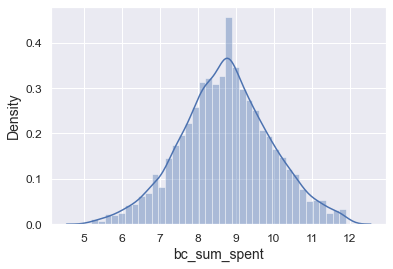

In [52]:
sns.distplot(df_credit['bc_sum_spent'])

### Plot it again to see the result

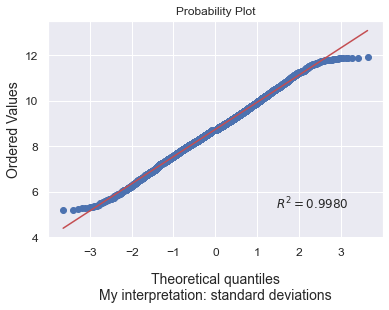

In [53]:
stats.probplot(df_credit['bc_sum_spent'], dist="norm", fit=True, rvalue=True, plot=plt)
plt.xlabel("Theoretical quantiles\nMy interpretation: standard deviations", labelpad=15)
plt.show()

In [54]:
test1 = df_credit

In [68]:
# Do a correlation plot across all x variables


In [57]:
test1

,region_2,region_3,region_4,region_5,townsize_2.0,townsize_3.0,townsize_4.0,townsize_5.0,gender_1,agecat_3,agecat_4,agecat_5,agecat_6,edcat_2,edcat_3,edcat_4,edcat_5,jobcat_2,jobcat_3,jobcat_4,jobcat_5,jobcat_6,union_1,employ_1,employ_2,employ_3,employ_4,employ_5,employ_6,employ_7,employ_8,employ_9,employ_10,employ_11,employ_12,employ_13,employ_14,employ_15,employ_16,employ_17,employ_18,employ_19,employ_20,employ_21,employ_22,employ_23,employ_24,employ_25,employ_26,employ_27,employ_28,employ_29,employ_30,employ_31,employ_32,employ_33,employ_34,employ_35,employ_36,employ_37,employ_38,employ_39,employ_40,employ_41,employ_42,employ_43,employ_44,employ_45,employ_46,employ_47,employ_48,employ_49,employ_51,employ_52,empcat_2,empcat_3,empcat_4,empcat_5,retire_1,inccat_2,inccat_3,inccat_4,inccat_5,default_1,jobsat_2,jobsat_3,jobsat_4,jobsat_5,marital_1,spousedcat_1,spousedcat_2,spousedcat_3,spousedcat_4,spousedcat_5,homeown_1,hometype_2,hometype_3,hometype_4,address_1,address_2,address_3,address_4,address_5,address_6,address_7,address_8,address_9,address_10,address_11,address_12,address_13,address_14,address_15,address_16,address_17,address_18,address_19,address_20,address_21,address_22,address_23,address_24,address_25,address_26,address_27,address_28,address_29,address_30,address_31,address_32,address_33,address_34,address_35,address_36,address_37,address_38,address_39,address_40,address_41,address_42,address_43,address_44,address_45,address_46,address_47,address_48,address_49,address_50,address_51,address_52,address_53,address_54,address_55,address_57,addresscat_2,addresscat_3,addresscat_4,addresscat_5,cars_1,cars_2,cars_3,cars_4,cars_5,cars_6,cars_7,cars_8,carown_0,carown_1,cartype_0,cartype_1,carcatvalue_1,carcatvalue_2,carcatvalue_3,carbought_0,carbought_1,carbuy_1,commute_2,commute_3,commute_4,commute_5,commute_6,commute_7,commute_8,commute_9,commute_10,commutecat_2,commutecat_3,commutecat_4,commutecat_5,commutecar_1,commutemotorcycle_1,commutecarpool_1,commutebus_1,commuterail_1,commutepublic_1,commutebike_1,commutewalk_1,commutenonmotor_1,telecommute_1,reason_2,reason_3,reason_4,reason_9,polview_2,polview_3,polview_4,polview_5,polview_6,polview_7,polparty_1,polcontrib_1,vote_1,card_2,card_3,card_4,card_5,cardtype_2,cardtype_3,cardtype_4,cardbenefit_2,cardbenefit_3,cardbenefit_4,cardfee_1,cardtenure_1,cardtenure_2,cardtenure_3,cardtenure_4,cardtenure_5,cardtenure_6,cardtenure_7,cardtenure_8,cardtenure_9,cardtenure_10,cardtenure_11,cardtenure_12,cardtenure_13,cardtenure_14,cardtenure_15,cardtenure_16,cardtenure_17,cardtenure_18,cardtenure_19,cardtenure_20,cardtenure_21,cardtenure_22,cardtenure_23,cardtenure_24,cardtenure_25,cardtenure_26,cardtenure_27,cardtenure_28,cardtenure_29,cardtenure_30,cardtenure_31,cardtenure_32,cardtenure_33,cardtenure_34,cardtenure_35,cardtenure_36,cardtenure_37,cardtenure_38,cardtenure_39,cardtenure_40,cardtenurecat_2,cardtenurecat_3,cardtenurecat_4,cardtenurecat_5,card2_2,card2_3,card2_4,card2_5,card2type_2,card2type_3,card2type_4,card2benefit_2,card2benefit_3,card2benefit_4,card2fee_1,card2tenure_1,card2tenure_2,card2tenure_3,card2tenure_4,card2tenure_5,card2tenure_6,card2tenure_7,card2tenure_8,card2tenure_9,card2tenure_10,card2tenure_11,card2tenure_12,card2tenure_13,card2tenure_14,card2tenure_15,card2tenure_16,card2tenure_17,card2tenure_18,card2tenure_19,card2tenure_20,card2tenure_21,card2tenure_22,card2tenure_23,card2tenure_24,card2tenure_25,card2tenure_26,card2tenure_27,card2tenure_28,card2tenure_29,card2tenure_30,card2tenurecat_2,card2tenurecat_3,card2tenurecat_4,card2tenurecat_5,active_1,bfast_2,bfast_3,churn_1,tollfree_1,equip_1,callcard_1,wireless_1,multline_1,voice_1,pager_1,internet_1,internet_2,internet_3,internet_4,callid_1,callwait_1,forward_1,confer_1,ebill_1,owntv_1,ownvcr_1,owndvd_1,owncd_1,ownpda_1,ownpc_1,ownipod_1,owngame_1,ownfax_1,news_1,response_01_1,response_02_1,response_03_1,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,reside,pets,pets_cats,pets_d

In [56]:
test1.drop(['sum_spent'], axis=1, inplace=True)

In [58]:
x_axis_corr = test1

In [59]:
x_axis_corr.drop(['bc_sum_spent'],axis=1,inplace=True)

In [60]:
x_axis_corr

,region_2,region_3,region_4,region_5,townsize_2.0,townsize_3.0,townsize_4.0,townsize_5.0,gender_1,agecat_3,agecat_4,agecat_5,agecat_6,edcat_2,edcat_3,edcat_4,edcat_5,jobcat_2,jobcat_3,jobcat_4,jobcat_5,jobcat_6,union_1,employ_1,employ_2,employ_3,employ_4,employ_5,employ_6,employ_7,employ_8,employ_9,employ_10,employ_11,employ_12,employ_13,employ_14,employ_15,employ_16,employ_17,employ_18,employ_19,employ_20,employ_21,employ_22,employ_23,employ_24,employ_25,employ_26,employ_27,employ_28,employ_29,employ_30,employ_31,employ_32,employ_33,employ_34,employ_35,employ_36,employ_37,employ_38,employ_39,employ_40,employ_41,employ_42,employ_43,employ_44,employ_45,employ_46,employ_47,employ_48,employ_49,employ_51,employ_52,empcat_2,empcat_3,empcat_4,empcat_5,retire_1,inccat_2,inccat_3,inccat_4,inccat_5,default_1,jobsat_2,jobsat_3,jobsat_4,jobsat_5,marital_1,spousedcat_1,spousedcat_2,spousedcat_3,spousedcat_4,spousedcat_5,homeown_1,hometype_2,hometype_3,hometype_4,address_1,address_2,address_3,address_4,address_5,address_6,address_7,address_8,address_9,address_10,address_11,address_12,address_13,address_14,address_15,address_16,address_17,address_18,address_19,address_20,address_21,address_22,address_23,address_24,address_25,address_26,address_27,address_28,address_29,address_30,address_31,address_32,address_33,address_34,address_35,address_36,address_37,address_38,address_39,address_40,address_41,address_42,address_43,address_44,address_45,address_46,address_47,address_48,address_49,address_50,address_51,address_52,address_53,address_54,address_55,address_57,addresscat_2,addresscat_3,addresscat_4,addresscat_5,cars_1,cars_2,cars_3,cars_4,cars_5,cars_6,cars_7,cars_8,carown_0,carown_1,cartype_0,cartype_1,carcatvalue_1,carcatvalue_2,carcatvalue_3,carbought_0,carbought_1,carbuy_1,commute_2,commute_3,commute_4,commute_5,commute_6,commute_7,commute_8,commute_9,commute_10,commutecat_2,commutecat_3,commutecat_4,commutecat_5,commutecar_1,commutemotorcycle_1,commutecarpool_1,commutebus_1,commuterail_1,commutepublic_1,commutebike_1,commutewalk_1,commutenonmotor_1,telecommute_1,reason_2,reason_3,reason_4,reason_9,polview_2,polview_3,polview_4,polview_5,polview_6,polview_7,polparty_1,polcontrib_1,vote_1,card_2,card_3,card_4,card_5,cardtype_2,cardtype_3,cardtype_4,cardbenefit_2,cardbenefit_3,cardbenefit_4,cardfee_1,cardtenure_1,cardtenure_2,cardtenure_3,cardtenure_4,cardtenure_5,cardtenure_6,cardtenure_7,cardtenure_8,cardtenure_9,cardtenure_10,cardtenure_11,cardtenure_12,cardtenure_13,cardtenure_14,cardtenure_15,cardtenure_16,cardtenure_17,cardtenure_18,cardtenure_19,cardtenure_20,cardtenure_21,cardtenure_22,cardtenure_23,cardtenure_24,cardtenure_25,cardtenure_26,cardtenure_27,cardtenure_28,cardtenure_29,cardtenure_30,cardtenure_31,cardtenure_32,cardtenure_33,cardtenure_34,cardtenure_35,cardtenure_36,cardtenure_37,cardtenure_38,cardtenure_39,cardtenure_40,cardtenurecat_2,cardtenurecat_3,cardtenurecat_4,cardtenurecat_5,card2_2,card2_3,card2_4,card2_5,card2type_2,card2type_3,card2type_4,card2benefit_2,card2benefit_3,card2benefit_4,card2fee_1,card2tenure_1,card2tenure_2,card2tenure_3,card2tenure_4,card2tenure_5,card2tenure_6,card2tenure_7,card2tenure_8,card2tenure_9,card2tenure_10,card2tenure_11,card2tenure_12,card2tenure_13,card2tenure_14,card2tenure_15,card2tenure_16,card2tenure_17,card2tenure_18,card2tenure_19,card2tenure_20,card2tenure_21,card2tenure_22,card2tenure_23,card2tenure_24,card2tenure_25,card2tenure_26,card2tenure_27,card2tenure_28,card2tenure_29,card2tenure_30,card2tenurecat_2,card2tenurecat_3,card2tenurecat_4,card2tenurecat_5,active_1,bfast_2,bfast_3,churn_1,tollfree_1,equip_1,callcard_1,wireless_1,multline_1,voice_1,pager_1,internet_1,internet_2,internet_3,internet_4,callid_1,callwait_1,forward_1,confer_1,ebill_1,owntv_1,ownvcr_1,owndvd_1,owncd_1,ownpda_1,ownpc_1,ownipod_1,owngame_1,ownfax_1,news_1,response_01_1,response_02_1,response_03_1,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,reside,pets,pets_cats,pets_d

In [62]:
cor= x_axis_corr.corr(method='pearson')
print(cor)

              region_2  region_3  region_4  region_5  townsize_2.0  \
region_2      1.000000 -0.249686 -0.243911 -0.253417      0.026397   
region_3     -0.249686  1.000000 -0.245134 -0.254688      0.027941   
region_4     -0.243911 -0.245134  1.000000 -0.248798     -0.004323   
region_5     -0.253417 -0.254688 -0.248798  1.000000     -0.084239   
townsize_2.0  0.026397  0.027941 -0.004323 -0.084239      1.000000   
...                ...       ...       ...       ...           ...   
wiremon      -0.015539  0.001429  0.023186  0.010848      0.008280   
lnwiremon    -0.013257 -0.004379  0.019282 -0.000283      0.004877   
wireten      -0.017053 -0.008873  0.021045  0.009772     -0.003204   
lnwireten    -0.010418 -0.026118  0.009449 -0.000319     -0.002287   
hourstv      -0.015205 -0.021267  0.023335  0.003986     -0.011127   

              townsize_3.0  townsize_4.0  townsize_5.0  gender_1  agecat_3  \
region_2          0.013659     -0.021990     -0.119599  0.005929  0.000383   
reg

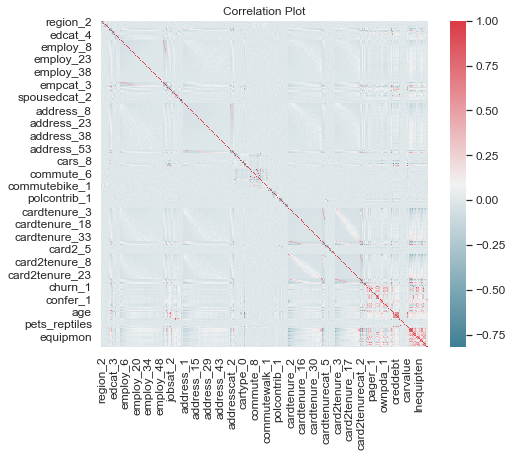

In [358]:
fig, ax =plt.subplots(figsize=(8, 6))
plt.title("Correlation Plot")
sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

## 5. Modelling 

#### Divide data into train and test data 

In [59]:
test1.columns

Index(['region_2', 'region_3', 'region_4', 'region_5', 'townsize_2.0',
       'townsize_3.0', 'townsize_4.0', 'townsize_5.0', 'gender_1', 'agecat_3',
       ...
       'cardmon', 'lncardmon', 'cardten', 'lncardten', 'wiremon', 'lnwiremon',
       'wireten', 'lnwireten', 'hourstv', 'bc_sum_spent'],
      dtype='object', length=389)

In [60]:
test1

,region_2,region_3,region_4,region_5,townsize_2.0,townsize_3.0,townsize_4.0,townsize_5.0,gender_1,agecat_3,agecat_4,agecat_5,agecat_6,edcat_2,edcat_3,edcat_4,edcat_5,jobcat_2,jobcat_3,jobcat_4,jobcat_5,jobcat_6,union_1,employ_1,employ_2,employ_3,employ_4,employ_5,employ_6,employ_7,employ_8,employ_9,employ_10,employ_11,employ_12,employ_13,employ_14,employ_15,employ_16,employ_17,employ_18,employ_19,employ_20,employ_21,employ_22,employ_23,employ_24,employ_25,employ_26,employ_27,employ_28,employ_29,employ_30,employ_31,employ_32,employ_33,employ_34,employ_35,employ_36,employ_37,employ_38,employ_39,employ_40,employ_41,employ_42,employ_43,employ_44,employ_45,employ_46,employ_47,employ_48,employ_49,employ_51,employ_52,empcat_2,empcat_3,empcat_4,empcat_5,retire_1,inccat_2,inccat_3,inccat_4,inccat_5,default_1,jobsat_2,jobsat_3,jobsat_4,jobsat_5,marital_1,spousedcat_1,spousedcat_2,spousedcat_3,spousedcat_4,spousedcat_5,homeown_1,hometype_2,hometype_3,hometype_4,address_1,address_2,address_3,address_4,address_5,address_6,address_7,address_8,address_9,address_10,address_11,address_12,address_13,address_14,address_15,address_16,address_17,address_18,address_19,address_20,address_21,address_22,address_23,address_24,address_25,address_26,address_27,address_28,address_29,address_30,address_31,address_32,address_33,address_34,address_35,address_36,address_37,address_38,address_39,address_40,address_41,address_42,address_43,address_44,address_45,address_46,address_47,address_48,address_49,address_50,address_51,address_52,address_53,address_54,address_55,address_57,addresscat_2,addresscat_3,addresscat_4,addresscat_5,cars_1,cars_2,cars_3,cars_4,cars_5,cars_6,cars_7,cars_8,carown_0,carown_1,cartype_0,cartype_1,carcatvalue_1,carcatvalue_2,carcatvalue_3,carbought_0,carbought_1,carbuy_1,commute_2,commute_3,commute_4,commute_5,commute_6,commute_7,commute_8,commute_9,commute_10,commutecat_2,commutecat_3,commutecat_4,commutecat_5,commutecar_1,commutemotorcycle_1,commutecarpool_1,commutebus_1,commuterail_1,commutepublic_1,commutebike_1,commutewalk_1,commutenonmotor_1,telecommute_1,reason_2,reason_3,reason_4,reason_9,polview_2,polview_3,polview_4,polview_5,polview_6,polview_7,polparty_1,polcontrib_1,vote_1,card_2,card_3,card_4,card_5,cardtype_2,cardtype_3,cardtype_4,cardbenefit_2,cardbenefit_3,cardbenefit_4,cardfee_1,cardtenure_1,cardtenure_2,cardtenure_3,cardtenure_4,cardtenure_5,cardtenure_6,cardtenure_7,cardtenure_8,cardtenure_9,cardtenure_10,cardtenure_11,cardtenure_12,cardtenure_13,cardtenure_14,cardtenure_15,cardtenure_16,cardtenure_17,cardtenure_18,cardtenure_19,cardtenure_20,cardtenure_21,cardtenure_22,cardtenure_23,cardtenure_24,cardtenure_25,cardtenure_26,cardtenure_27,cardtenure_28,cardtenure_29,cardtenure_30,cardtenure_31,cardtenure_32,cardtenure_33,cardtenure_34,cardtenure_35,cardtenure_36,cardtenure_37,cardtenure_38,cardtenure_39,cardtenure_40,cardtenurecat_2,cardtenurecat_3,cardtenurecat_4,cardtenurecat_5,card2_2,card2_3,card2_4,card2_5,card2type_2,card2type_3,card2type_4,card2benefit_2,card2benefit_3,card2benefit_4,card2fee_1,card2tenure_1,card2tenure_2,card2tenure_3,card2tenure_4,card2tenure_5,card2tenure_6,card2tenure_7,card2tenure_8,card2tenure_9,card2tenure_10,card2tenure_11,card2tenure_12,card2tenure_13,card2tenure_14,card2tenure_15,card2tenure_16,card2tenure_17,card2tenure_18,card2tenure_19,card2tenure_20,card2tenure_21,card2tenure_22,card2tenure_23,card2tenure_24,card2tenure_25,card2tenure_26,card2tenure_27,card2tenure_28,card2tenure_29,card2tenure_30,card2tenurecat_2,card2tenurecat_3,card2tenurecat_4,card2tenurecat_5,active_1,bfast_2,bfast_3,churn_1,tollfree_1,equip_1,callcard_1,wireless_1,multline_1,voice_1,pager_1,internet_1,internet_2,internet_3,internet_4,callid_1,callwait_1,forward_1,confer_1,ebill_1,owntv_1,ownvcr_1,owndvd_1,owncd_1,ownpda_1,ownpc_1,ownipod_1,owngame_1,ownfax_1,news_1,response_01_1,response_02_1,response_03_1,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,reside,pets,pets_cats,pets_d

In [61]:
x = test1.columns.difference(['bc_sum_spent'])

In [62]:
# Splitting the data - use 80% of the data for training
train_x,test_x,train_y,test_y=train_test_split(test1[x],
                                              test1['bc_sum_spent'],
                                              test_size=0.2,
                                              random_state=20)

In [63]:
print (len(train_x))
print (len(test_x))
print (len(train_y))
print (len(test_y))

4000
1000
4000
1000


### 5.1 Feature selection by random forrest

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [94]:
RandomForestRegressor?

In [65]:
# Use GridSearchCV with a RandomForestRegressor
param_grid={'n_estimators':np.arange(10,30)}

tree=GridSearchCV(RandomForestRegressor(oob_score=False,warm_start=True),param_grid,cv=2)
tree.fit(train_x,train_y) 

GridSearchCV(cv=2, estimator=RandomForestRegressor(warm_start=True),
             param_grid={'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29])})

In [66]:
tree.best_params_

{'n_estimators': 24}

In [67]:
# Fit to model
Forest_credit=RandomForestRegressor(oob_score=True,n_estimators=24)

In [68]:
Forest_credit.fit( train_x, train_y)

RandomForestRegressor(n_estimators=24, oob_score=True)

In [69]:
Forest_credit.oob_score_

0.12143073433471918

<AxesSubplot:xlabel='importance', ylabel='feature'>

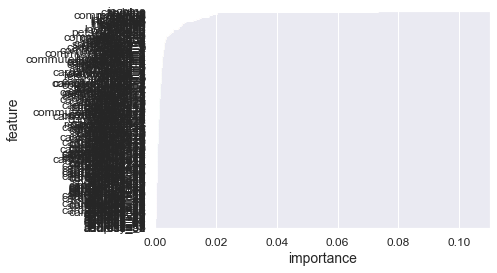

In [70]:
indices = np.argsort(Forest_credit.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_x.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_x.columns[indices[f]],
                         Forest_credit.feature_importances_[indices[f]]]
sns.barplot( y = 'feature', x = 'importance', data = feature_rank )

In [104]:

feature_rank

,rank,feature,importance
0,1,lninc,0.086482
1,2,income,0.085115
2,3,carvalue,0.024428
3,4,hourstv,0.020624
4,5,debtinc,0.020427
...,...,...,...
383,384,address_52,0.000000
384,385,employ_48,0.000000
385,386,address_54,0.000000
386,387,address_53,0.000000


In [71]:
#Select features and then convert it into list
x=feature_rank.loc[0:60,['feature']]
x=x['feature'].tolist()
print(x)

['income', 'lninc', 'carvalue', 'hourstv', 'debtinc', 'reason_2', 'commutetime', 'card_3', 'card_4', 'card_2', 'age', 'othdebt', 'creddebt', 'ed', 'lncreddebt', 'lnothdebt', 'lncardten', 'pets', 'lncardmon', 'tenure', 'lntollten', 'lnequipten', 'lnlongmon', 'lntollmon', 'cardmon', 'spoused', 'cardten', 'longmon', 'tollmon', 'lnlongten', 'longten', 'lnequipmon', 'card2_3', 'reside', 'pets_dogs', 'card_5', 'card2_2', 'pets_freshfish', 'tollten', 'gender_1', 'pets_cats', 'equipten', 'lnwireten', 'lnwiremon', 'card2_4', 'commutebus_1', 'carbought_0', 'equipmon', 'card2type_2', 'wiremon', 'card2fee_1', 'cardtype_4', 'pets_birds', 'pets_small', 'carbuy_1', 'cardbenefit_3', 'wireten', 'homeown_1', 'spousedcat_2', 'polparty_1', 'cars_2']


In [72]:
rf_features=['income', 'lninc', 'carvalue', 'hourstv', 'debtinc', 'reason_2', 'commutetime', 'card_3', 'card_4', 'card_2', 'age', 'othdebt', 'creddebt', 'ed', 'lncreddebt', 'lnothdebt', 'lncardten', 'pets', 'lncardmon', 'tenure', 'lntollten', 'lnequipten', 'lnlongmon', 'lntollmon', 'cardmon', 'spoused', 'cardten', 'longmon', 'tollmon', 'lnlongten', 'longten', 'lnequipmon', 'card2_3', 'reside', 'pets_dogs', 'card_5', 'card2_2', 'pets_freshfish', 'tollten', 'gender_1', 'pets_cats', 'equipten', 'lnwireten', 'lnwiremon', 'card2_4', 'commutebus_1', 'carbought_0', 'equipmon', 'card2type_2', 'wiremon', 'card2fee_1', 'cardtype_4', 'pets_birds', 'pets_small', 'carbuy_1', 'cardbenefit_3', 'wireten', 'homeown_1', 'spousedcat_2', 'polparty_1', 'cars_2']
rf_features.append('bc_sum_spent')
df_rf= test1[rf_features]

df_rf.head(5)

,income,lninc,carvalue,hourstv,debtinc,reason_2,commutetime,card_3,card_4,card_2,age,othdebt,creddebt,ed,lncreddebt,lnothdebt,lncardten,pets,lncardmon,tenure,lntollten,lnequipten,lnlongmon,lntollmon,cardmon,spoused,cardten,longmon,tollmon,lnlongten,longten,lnequipmon,card2_3,reside,pets_dogs,card_5,card2_2,pets_freshfish,tollten,gender_1,pets_cats,equipten,lnwireten,lnwiremon,card2_4,commutebus_1,carbought_0,equipmon,card2type_2,wiremon,card2fee_1,cardtype_4,pets_birds,pets_small,carbuy_1,cardbenefit_3,wireten,homeown_1,spousedcat_2,polparty_1,cars_2,bc_sum_spent
0,31,3.433987,14.3,13,11.1,0,22.0,1,0,0,20,2.240091,1.200909,15,0.183079,0.806516,4.094345,0,2.656757,5,5.081715,4.837075,1.871802,3.367296,14.25,-1,60.0,6.50,29.0,3.538057,34.40,3.384390,0,3,0,0,0,0,161.05,1,0,126.1,7.147185,3.597997,0,0,1,29.50,0,0.00,0,0,0,0,0,0,0.00,0,0,1,1,6.793248
1,15,2.708050,6.8,18,18.6,0,29.0,0,0,1,22,1.567980,1.222020,17,0.200505,0.449788,6.413459,6,2.772589,39,6.858013,7.588324,2.186051,3.228826,16.00,-1,610.0,8.90,0.0,5.800909,330.60,4.004602,0,2,0,0,0,6,0.00,0,0,1975.0,7.428660,3.821004,1,1,1,54.85,0,45.65,0,1,0,0,0,0,1683.55,1,0,1,1,5.662490
2,35,3.555348,18.8,21,9.9,1,24.0,0,0,1,67,2.536380,0.928620,14,-0.074056,0.930738,7.251345,3,3.135494,65,6.858013,7.050556,3.346389,3.228826,23.00,13,1410.0,28.40,0.0,7.527444,1858.35,3.598681,0,3,1,0,0,0,0.00,1,2,0.0,7.147185,3.597997,1,1,1,0.00,0,0.00,0,0,0,0,1,0,0.00,1,1,1,0,8.449515
3,20,2.995732,8.7,26,5.7,0,38.0,0,0,1,23,1.117200,0.022800,16,-3.780995,0.110826,6.529419,0,3.044522,36,6.858013,7.050556,1.791759,3.228826,21.00,18,685.0,6.00,0.0,5.295564,199.45,3.598681,1,5,0,0,0,0,0.00,0,0,0.0,7.147185,3.597997,0,0,1,0.00,1,0.00,0,0,0,0,1,0,0.00,1,0,0,0,8.446429
4,23,3.135494,10.6,27,1.7,0,32.0,0,1,0,26,0.176341,0.214659,16,-1.538705,-1.735336,5.886104,0,2.847812,21,5.960232,7.050556,1.115142,2.803360,17.25,13,360.0,3.05,16.5,4.305416,74.10,3.598681,0,4,0,0,0,0,387.70,0,0,0.0,6.018106,2.947067,0,0,1,0.00,0,19.05,0,0,0,0,1,0,410.80,0,1,0,0,9.145462


In [76]:
# Create data frame with selected features


,income,lninc,card_3,card_2,carvalue,card_4,commutetime,reason_2,debtinc,hourstv,creddebt,age,lncreddebt,tenure,lncardmon,lnothdebt,ed,othdebt,pets,lncardten,lntollmon,cardmon,longmon,card_5,lnlongmon,reside,spoused,cardten,lntollten,lnequipmon,lnlongten,tollten,longten,tollmon,lnwiremon,card2_2,card2_3,pets_freshfish,lnequipten,gender_1,pets_dogs,equipten,wireten,pets_cats,address_22,equipmon,wiremon,jobsat_4,commutebus_1,card2benefit_4,bc_total_spend
0,31.0,3.433987,1,0,14.3,0,22.0,0,11.1,13,1.200909,20,0.183079,5,2.656757,0.806516,15,2.240091,0,4.094345,3.367296,14.25,6.50,0,1.871802,3,-1,60.0,5.081715,3.384390,3.538057,161.05,34.40,29.0,3.604226,0,0,0,4.837075,1,0,126.1,0.00,0,0,29.50,0.00,0,0,0,7.323447
1,15.0,2.708050,0,1,6.8,0,29.0,0,18.6,18,1.222020,22,0.200505,39,2.772589,0.449788,17,1.567980,6,6.413459,3.242727,16.00,8.90,0,2.186051,2,-1,610.0,6.585937,4.004602,5.800909,0.00,330.60,0.0,3.821004,0,0,6,7.588324,0,0,1975.0,1683.55,0,0,54.85,45.65,0,1,0,6.039640
2,35.0,3.555348,0,1,18.8,0,24.0,1,9.9,21,0.928620,67,-0.074056,65,3.135494,0.930738,14,2.536380,3,7.251345,3.242727,23.00,28.40,0,3.346389,3,13,1410.0,6.585937,3.599725,7.527444,0.00,1858.35,0.0,3.604226,0,0,0,6.747846,1,1,0.0,0.00,2,0,0.00,0.00,1,1,0,9.243615
3,20.0,2.995732,0,1,8.7,0,38.0,0,5.7,26,0.033160,23,-3.401690,36,3.044522,0.110826,16,1.117200,0,6.529419,3.242727,21.00,6.00,0,1.791759,5,18,685.0,6.585937,3.599725,5.295564,0.00,199.45,0.0,3.604226,0,1,0,6.747846,0,0,0.0,0.00,0,0,0.00,0.00,0,0,1,9.239995
4,23.0,3.135494,0,0,10.6,1,32.0,0,1.7,27,0.214659,26,-1.538705,21,2.847812,-1.735336,16,0.176341,0,5.886104,2.803360,17.25,3.05,0,1.115142,4,13,360.0,5.960232,3.599725,4.305416,387.70,74.10,16.5,2.947067,0,0,0,6.747846,0,0,0.0,410.80,0,0,0.00,19.05,0,0,0,10.063778


### 5.2 Find multicolinearlity

In [73]:
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [163]:
del rf_features[-1]

In [74]:
%%capture
#gather features
features = "+".join(rf_features)

In [75]:
features

'income+lninc+carvalue+hourstv+debtinc+reason_2+commutetime+card_3+card_4+card_2+age+othdebt+creddebt+ed+lncreddebt+lnothdebt+lncardten+pets+lncardmon+tenure+lntollten+lnequipten+lnlongmon+lntollmon+cardmon+spoused+cardten+longmon+tollmon+lnlongten+longten+lnequipmon+card2_3+reside+pets_dogs+card_5+card2_2+pets_freshfish+tollten+gender_1+pets_cats+equipten+lnwireten+lnwiremon+card2_4+commutebus_1+carbought_0+equipmon+card2type_2+wiremon+card2fee_1+cardtype_4+pets_birds+pets_small+carbuy_1+cardbenefit_3+wireten+homeown_1+spousedcat_2+polparty_1+cars_2+bc_sum_spent'

In [76]:
# get y and X dataframes based on this regression:
y, X = dmatrices('bc_sum_spent~' + features,df_rf, return_type='dataframe')

In [77]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [78]:
vif.sort_values(by=['VIF Factor'],ascending=False)

,VIF Factor,features
0,1677.424009,Intercept
28,155.274035,longmon
31,131.951684,longten
18,36.130932,pets
38,30.413256,pets_freshfish
...,...,...
49,1.016127,card2type_2
51,1.015291,card2fee_1
56,1.014115,cardbenefit_3
52,1.013198,cardtype_4


In [79]:
#Select only those features whose Vif is greater than 10.
vif1=vif[vif['VIF Factor']>10].reset_index().loc[:,['features']]
vif1.drop([0],axis=0,inplace=True)
drop_vars= vif1["features"].tolist()
drop_vars

['pets',
 'tenure',
 'lnlongmon',
 'cardmon',
 'cardten',
 'longmon',
 'tollmon',
 'lnlongten',
 'longten',
 'pets_freshfish',
 'tollten',
 'equipten',
 'equipmon',
 'wiremon',
 'wireten']

In [80]:
# dropping variables that have VIF greater than 10
df_rf.drop(drop_vars,axis=1,inplace=True)

In [81]:
df_rf.shape

(5000, 47)

### 5.3 - All x variables should have a linear relationship with Y

In [82]:
sns.lmplot(x="income",y="bc_total_spend",data=df_rf,aspect=5,scatter_kws={'alpha':0.5})

KeyError: "['bc_total_spend'] not in index"

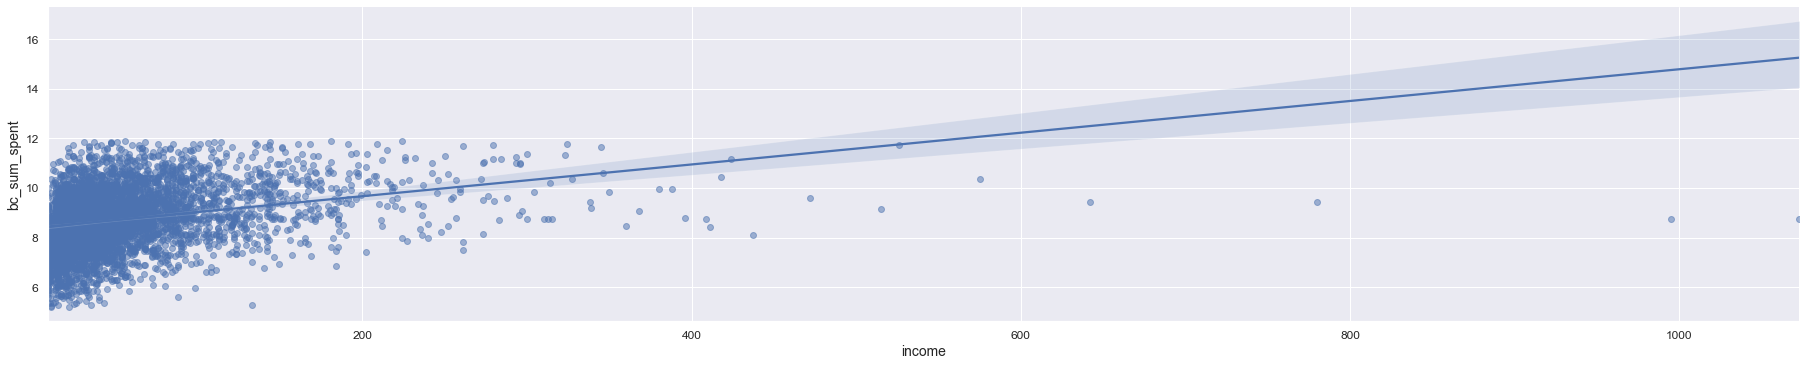

In [83]:
sns.lmplot(x="income",y="bc_sum_spent",data=df_rf,aspect=5,scatter_kws={'alpha':0.5})

### 5.4 Splitting data for training and testing

In [84]:
from scipy import stats
from scipy.stats import pearsonr

In [85]:
#function calculate p-values
def calculate_pvalues(df):
    df = df.select_dtypes(include=['number'])
    pairs = pd.MultiIndex.from_product([df.columns, df.columns])
    pvalues = [pearsonr(df[a], df[b])[1] for a, b in pairs]
    pvalues = pd.Series(pvalues, index=pairs).unstack().round(4)
    return pvalues

In [89]:
z=calculate_pvalues(df_rf)

In [117]:
z.loc[z.iloc[1]<0.05]

,age,bc_sum_spent,carbought_0,carbuy_1,card2_2,card2_3,card2_4,card2fee_1,card2type_2,card_2,card_3,card_4,card_5,cardbenefit_3,cardtype_4,cars_2,carvalue,commutebus_1,commutetime,creddebt,debtinc,ed,gender_1,homeown_1,hourstv,income,lncardmon,lncardten,lncreddebt,lnequipmon,lnequipten,lninc,lnothdebt,lntollmon,lntollten,lnwiremon,lnwireten,othdebt,pets_birds,pets_cats,pets_dogs,pets_small,polparty_1,reason_2,reside,spoused,spousedcat_2
bc_sum_spent,0.1138,0.0000,0.1946,0.1258,0.0000,0.0000,0.0000,0.1732,0.4570,0.0000,0.0000,0.0000,0.0009,0.2530,0.9894,0.2639,0.0000,0.4720,0.9216,0.0000,0.3639,0.0000,0.0000,0.0000,0.0067,0.0000,0.4865,0.0057,0.0000,0.0000,0.0043,0.0000,0.0000,0.0000,0.0000,0.0001,0.0013,0.0000,0.0671,0.5057,0.9602,0.7585,0.6334,0.0000,0.6329,0.0362,0.6520
card2_2,0.9527,0.0000,0.1358,0.0572,0.0000,0.0000,0.0000,0.3836,0.4260,0.0000,0.0000,0.0000,0.0000,0.1493,0.0139,0.4420,0.6918,0.2429,0.9754,0.5400,0.5926,0.0182,0.8881,0.3464,0.2412,0.9725,0.7521,0.2360,0.7923,0.9529,0.8762,0.6674,0.9719,0.7445,0.9305,0.9828,0.5726,0.8685,0.1634,0.9397,0.6125,0.6877,0.6049,0.0685,0.9337,0.0200,0.4111
card2_3,0.0684,0.0000,0.4421,0.6275,0.0000,0.0000,0.0000,0.5753,0.9327,0.0000,0.0000,0.0000,0.0000,0.6300,0.7286,0.8826,0.0009,0.2238,0.2943,0.5610,0.6705,0.0175,0.0004,0.1108,0.8655,0.0439,0.4801,0.0164,0.0176,0.9009,0.8492,0.0007,0.0396,0.3832,0.0325,0.1618,0.0460,0.3107,0.9385,0.2045,0.0033,0.8942,0.8380,0.7216,0.5504,0.1663,0.4154
card2_4,0.5685,0.0000,0.3389,0.5324,0.0000,0.0000,0.0000,0.5225,0.9892,0.0000,0.0004,0.0000,0.0000,0.0192,0.2937,0.4394,0.0052,0.0171,0.9913,0.6195,0.7211,0.0000,0.0973,0.0228,0.6814,0.0765,0.8714,0.2781,0.0130,0.4073,0.8024,0.0034,0.0653,0.1495,0.1283,0.0183,0.1419,0.3633,0.8934,0.8435,0.1103,0.4684,0.8800,0.1964,0.0442,0.0002,0.0211
card_2,0.9064,0.0000,0.3717,0.0553,0.0000,0.0000,0.0000,0.0209,0.1501,0.0000,0.0000,0.0000,0.0000,0.1107,0.9254,0.1572,0.0000,0.4757,0.8688,0.0000,0.1441,0.0000,0.0060,0.0175,0.3289,0.0000,0.5170,0.2293,0.0000,0.0245,0.3192,0.0000,0.0000,0.6426,0.5335,0.2512,0.2068,0.0000,0.4945,0.6487,0.9778,0.0254,0.8083,0.2666,0.3319,0.1290,0.7350
card_3,0.4402,0.0000,0.3066,0.4004,0.0000,0.0000,0.0004,0.5894,0.8538,0.0000,0.0000,0.0000,0.0000,0.5823,0.7372,0.7942,0.0001,0.7259,0.5189,0.0947,0.7034,0.0000,0.0773,0.0505,0.4011,0.0000,0.5806,0.2509,0.1235,0.3321,0.7571,0.0000,0.0005,0.2473,0.2860,0.3919,0.1068,0.0018,0.4419,0.5262,0.3852,0.1380,0.5707,0.4803,0.1930,0.0013,0.7603
card_4,0.0999,0.0000,0.7084,0.2368,0.0000,0.0000,0.0000,0.0296,0.0266,0.0000,0.0000,0.0000,0.0000,0.1768,0.7306,0.6308,0.0000,0.1092,0.5177,0.0000,0.4562,0.0000,0.5729,0.0002,0.2768,0.0000,0.4487,0.2587,0.0000,0.0129,0.4711,0.0000,0.0000,0.3298,0.3196,0.0473,0.8599,0.0000,0.5346,0.3268,0.5582,0.6528,0.5722,0.0000,0.8516,0.0014,0.4353
card_5,0.0144,0.0009,0.0302,0.8303,0.0000,0.0000,0.0000,0.4550,0.1151,0.0000,0.0000,0.0000,0.0000,0.8529,0.0433,0.2034,0.0000,0.2980,0.2168,0.0067,0.5416,0.0000,0.0104,0.0200,0.5943,0.0000,0.2557,0.0434,0.0000,0.0801,0.6834,0.0000,0.0000,0.1015,0.0291,0.0168,0.6603,0.0004,0.7414,0.8479,0.4648,0.5925,0.8937,0.3954,0.9019,0.0008,0.6808
carvalue,0.0000,0.0000,0.0000,0.9766,0.6918,0.0009,0.0052,0.9160,0.5812,0.0000,0.0001,0.0000,0.0000,0.9839,0.7563,0.0000,0.0000,0.2727,0.1733,0.0000,0.3256,0.0000,0.5972,0.0000,0.0010,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5793,0.6541,0.2290,0.9056,0.2339,0.1758,0.0000,0.0313,0.1386
creddebt,0.0000,0.0000,0.0092,0.4099,0.5400,0.5610,0.6195,0.4931,0.5959,0.0000,0.0947,0.0000,0.0067,0.7416,0.4800,0.9410,0.0000,0.1739,0.8287,0.0000,0.0000,0.0000,0.3895,0.0000,0.0078,0.0000,0.0040,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3956,0.9079,0.1707,0.6970,0.3268,0.3302,0.0021,0.4868,0.0635


In [118]:
# Dropping variables one at a time which have p-values greater than 5%
feature_filtered=z.loc[z.iloc[1]<0.05]

In [123]:
a=feature_filtered.index.values.tolist()

In [131]:
feature_columns=a[1::]

In [130]:
feature_columns

Index(['age', 'carbought_0', 'carbuy_1', 'card2_2', 'card2_3', 'card2_4',
       'card2fee_1', 'card2type_2', 'card_2', 'card_3', 'card_4', 'card_5',
       'cardbenefit_3', 'cardtype_4', 'cars_2', 'carvalue', 'commutebus_1',
       'commutetime', 'creddebt', 'debtinc', 'ed', 'gender_1', 'homeown_1',
       'hourstv', 'income', 'lncardmon', 'lncardten', 'lncreddebt',
       'lnequipmon', 'lnequipten', 'lninc', 'lnothdebt', 'lntollmon',
       'lntollten', 'lnwiremon', 'lnwireten', 'othdebt', 'pets_birds',
       'pets_cats', 'pets_dogs', 'pets_small', 'polparty_1', 'reason_2',
       'reside', 'spoused', 'spousedcat_2'],
      dtype='object')

In [132]:
feature_columns

['card2_2',
 'card2_3',
 'card2_4',
 'card_2',
 'card_3',
 'card_4',
 'card_5',
 'carvalue',
 'creddebt',
 'ed',
 'gender_1',
 'homeown_1',
 'hourstv',
 'income',
 'lncardten',
 'lncreddebt',
 'lnequipmon',
 'lnequipten',
 'lninc',
 'lnothdebt',
 'lntollmon',
 'lntollten',
 'lnwiremon',
 'lnwireten',
 'othdebt',
 'reason_2',
 'spoused']

In [134]:
df_rf[feature_columns]

,card2_2,card2_3,card2_4,card_2,card_3,card_4,card_5,carvalue,creddebt,ed,gender_1,homeown_1,hourstv,income,lncardten,lncreddebt,lnequipmon,lnequipten,lninc,lnothdebt,lntollmon,lntollten,lnwiremon,lnwireten,othdebt,reason_2,spoused
0,0,0,0,0,1,0,0,14.3,1.200909,15,1,0,13,31,4.094345,0.183079,3.384390,4.837075,3.433987,0.806516,3.367296,5.081715,3.597997,7.147185,2.240091,0,-1
1,0,0,1,1,0,0,0,6.8,1.222020,17,0,1,18,15,6.413459,0.200505,4.004602,7.588324,2.708050,0.449788,3.228826,6.858013,3.821004,7.428660,1.567980,0,-1
2,0,0,1,1,0,0,0,18.8,0.928620,14,1,1,21,35,7.251345,-0.074056,3.598681,7.050556,3.555348,0.930738,3.228826,6.858013,3.597997,7.147185,2.536380,1,13
3,0,1,0,1,0,0,0,8.7,0.022800,16,0,1,26,20,6.529419,-3.780995,3.598681,7.050556,2.995732,0.110826,3.228826,6.858013,3.597997,7.147185,1.117200,0,18
4,0,0,0,0,0,1,0,10.6,0.214659,16,0,0,27,23,5.886104,-1.538705,3.598681,7.050556,3.135494,-1.735336,2.803360,5.960232,2.947067,6.018106,0.176341,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,1,0,0,0,0,0,64.5,7.934080,10,0,1,19,196,7.355641,2.071167,3.598681,7.050556,5.278115,2.047166,3.228826,6.858013,3.597997,7.147185,7.745920,0,-1
4996,0,0,0,0,1,0,0,40.0,3.336600,14,0,1,14,83,6.684612,1.204952,3.598681,7.050556,4.418841,2.209746,3.597312,7.053759,3.328627,6.629825,9.113400,0,-1
4997,1,0,0,0,0,0,0,53.6,3.557520,17,0,1,16,108,6.975414,1.269064,3.598681,7.050556,4.682131,2.092664,3.784190,8.108473,3.597997,7.147185,8.106480,0,-1
4998,0,0,1,0,1,0,0,96.0,5.021352,19,0,1,24,189,5.843544,1.613699,3.386084,6.940077,5.241747,2.733760,3.228826,6.858013,3.597997,7.147185,15.390648,0,15


In [135]:
# split training and test sets
train_x,test_x,train_y,test_y=train_test_split(df_rf[feature_columns],
                                              df_rf['bc_sum_spent'],
                                               test_size=.2,
                                               random_state=123)

### Build Regression model using statsmodels.api

In [136]:
import statsmodels.api as sm

In [137]:
train_x = sm.add_constant(train_x)
test_x=sm.add_constant(test_x)
lm=sm.OLS(train_y,train_x).fit()

In [138]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:           bc_sum_spent   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     65.59
Date:                Sat, 10 Jul 2021   Prob (F-statistic):          4.37e-293
Time:                        19:16:09   Log-Likelihood:                -5702.1
No. Observations:                4000   AIC:                         1.146e+04
Df Residuals:                    3972   BIC:                         1.164e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5443      0.441     17.114      0.0

In [139]:
lm.pvalues.sort_values(ascending=False)

homeown_1      9.609854e-01
carvalue       6.836125e-01
creddebt       6.779910e-01
lnothdebt      5.889768e-01
spoused        5.777800e-01
lntollmon      5.506633e-01
hourstv        4.594102e-01
lncardten      4.564514e-01
lnwireten      4.484448e-01
income         4.303344e-01
othdebt        4.045275e-01
lnwiremon      3.774673e-01
lntollten      3.133150e-01
lnequipten     2.464604e-01
lncreddebt     1.936199e-01
lnequipmon     8.619657e-02
ed             3.358279e-02
gender_1       2.069360e-03
reason_2       1.057557e-15
card_5         5.606249e-25
card2_3        2.800961e-27
card2_4        2.123004e-27
card2_2        5.865705e-28
lninc          6.072494e-30
const          2.074339e-63
card_3         3.280265e-91
card_2         2.073490e-91
card_4        2.016770e-105
dtype: float64

In [140]:
print('Parameters:', lm.params) # Find the parameters of x i.e Beta value
print('R2: ', lm.rsquared) # Find the r**2

Parameters: const         7.544283
card2_2      -0.524243
card2_3      -0.513069
card2_4      -0.562589
card_2       -1.089342
card_3       -1.094896
card_4       -1.193666
card_5       -0.906615
carvalue      0.000555
creddebt     -0.004115
ed           -0.011288
gender_1     -0.099193
homeown_1    -0.001652
hourstv       0.002322
income       -0.000621
lncardten    -0.015609
lncreddebt    0.029141
lnequipmon    0.241400
lnequipten   -0.039405
lninc         0.614511
lnothdebt     0.015212
lntollmon    -0.053906
lntollten     0.037645
lnwiremon    -0.119219
lnwireten     0.035193
othdebt      -0.005230
reason_2      0.522841
spoused       0.001179
dtype: float64
R2:  0.30835287688011936


## 6. Evaluate Model Accuracy

In [141]:
test_pred=lm.predict(test_x)
train_pred=lm.predict(train_x)

from sklearn import metrics

print('MSE Test:',metrics.mean_squared_error(test_y,test_pred))
print('MSE Train:',metrics.mean_squared_error(train_y,train_pred))

MSE Test: 0.961185446629763
MSE Train: 1.013239136253715


In [142]:
print ('MAE:', metrics.mean_absolute_error(test_y, test_pred))
print ('MSE:', metrics.mean_squared_error(test_y, test_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, test_pred)))

MAE: 0.7799632538514207
MSE: 0.961185446629763
RMSE: 0.9804006561757102


In [96]:
# Print MAE, MSE, and RMSE for Predicted vs Actual


MAE: 0.9762061173805189
MSE: 1.5275402326420064
RMSE: 1.2359369857084164


In [143]:
# https://pkg.robjhyndman.com/forecast/reference/accuracy.html
    
MAPE_train = '%.3f' % np.mean(np.abs(train_y-train_pred)/(train_y))
MAPE_test = '%.3f' % np.mean(np.abs(test_y-test_pred)/(test_y))

# print the values of MAPE for train and test
print('MAPE of training data: ', MAPE_train,  ' | ', 'MAPE of testing data: ', MAPE_test)

MAPE of training data:  0.096  |  MAPE of testing data:  0.092


### 6.1 Check Normality and Residuals

***We will use Q-Q plot to examine this***

<AxesSubplot:ylabel='Density'>

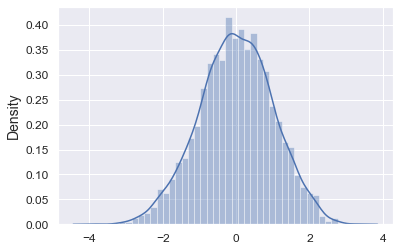

In [144]:
residuals=train_y-train_pred

import seaborn as sns

sns.distplot(residuals)

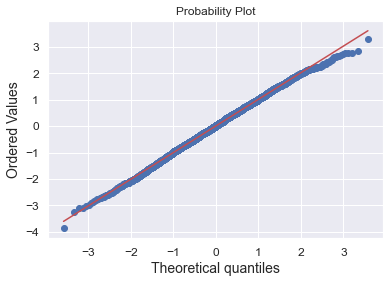

In [145]:
from scipy import stats
import pylab

stats.probplot(residuals,dist='norm',plot=pylab)
pylab.show()

***From the above histogram and Q-Q plot, shows that the residuals are normally distributed, so our  assumption is not violated***      the error/residuals are normally distributed means the model is not bias.

### 6.2 Predicting sales:

***We are going to predict credit card sales on Testing data***

In [146]:
df_rf=df_rf[feature_columns]

df_rf=sm.add_constant(df_rf)

df_rf.head()

,const,card2_2,card2_3,card2_4,card_2,card_3,card_4,card_5,carvalue,creddebt,ed,gender_1,homeown_1,hourstv,income,lncardten,lncreddebt,lnequipmon,lnequipten,lninc,lnothdebt,lntollmon,lntollten,lnwiremon,lnwireten,othdebt,reason_2,spoused
0,1.0,0,0,0,0,1,0,0,14.3,1.200909,15,1,0,13,31,4.094345,0.183079,3.384390,4.837075,3.433987,0.806516,3.367296,5.081715,3.597997,7.147185,2.240091,0,-1
1,1.0,0,0,1,1,0,0,0,6.8,1.222020,17,0,1,18,15,6.413459,0.200505,4.004602,7.588324,2.708050,0.449788,3.228826,6.858013,3.821004,7.428660,1.567980,0,-1
2,1.0,0,0,1,1,0,0,0,18.8,0.928620,14,1,1,21,35,7.251345,-0.074056,3.598681,7.050556,3.555348,0.930738,3.228826,6.858013,3.597997,7.147185,2.536380,1,13
3,1.0,0,1,0,1,0,0,0,8.7,0.022800,16,0,1,26,20,6.529419,-3.780995,3.598681,7.050556,2.995732,0.110826,3.228826,6.858013,3.597997,7.147185,1.117200,0,18
4,1.0,0,0,0,0,0,1,0,10.6,0.214659,16,0,0,27,23,5.886104,-1.538705,3.598681,7.050556,3.135494,-1.735336,2.803360,5.960232,2.947067,6.018106,0.176341,0,13


In [165]:
# Final prediction on test file
from scipy.special import boxcox, inv_boxcox

pred_total_spend=inv_boxcox(lm.predict(df_rf),fitted_lambda)
pred_total_spend=pd.DataFrame(pred_total_spend.tolist())
pred_total_spend.columns = ['pred_total_spend']


#Concatenating final prediction with original test file
  
testfile = pd.concat([df_creditdata, pred_total_spend], axis=1)

testfile.head()

,region,townsize,gender,agecat,edcat,jobcat,union,employ,empcat,retire,inccat,default,jobsat,marital,spousedcat,homeown,hometype,address,addresscat,cars,carown,cartype,carcatvalue,carbought,carbuy,commute,commutecat,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,active,bfast,churn,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,carvalue,commutetime,tenure,longmon,lnlongmon,longten,lnlongten,tollmon,lntollmon,tollten,lntollten,equipmon,lnequipmon,equipten,lnequipten,cardmon,lncardmon,cardten,lncardten,wiremon,lnwiremon,wireten,lnwireten,hourstv,sum_spent,pred_total_spend
0,1,2.0,1,2,3,1,1,0,1,0,2,1,1,0,-1,0,2,0,1,2,1,0,1,0,0,8,4,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,0,3,1,1,1,1,0,1,1,1,0,0,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1,0,20,15,31,3.433987,11.1,1.200909,0.183079,2.240091,0.806516,-1,3,0,0,0,0,0,0,0,0,14.3,22.0,5,6.50,1.871802,34.40,3.538057,29.0,3.367296,161.05,5.081715,29.50,3.384390,126.1,4.837075,14.25,2.656757,60.0,4.094345,0.00,3.597997,0.00,7.147185,13,149.46,409.009928
1,5,5.0,0,2,4,2,0,0,1,0,1,1,1,0,-1,1,3,2,1,2,1,1,1,0,0,1,1,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,2,4,1,3,0,4,2,1,1,0,0,1,1,1,1,1,1,4,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,22,17,15,2.708050,18.6,1.222020,0.200505,1.567980,0.449788,-1,2,6,0,0,0,0,0,0,6,6.8,29.0,39,8.90,2.186051,330.60,5.800909,0.0,3.228826,0.00,6.858013,54.85,4.004602,1975.0,7.588324,16.00,2.772589,610.0,6.413459,45.65,3.821004,1683.55,7.428660,18,77.54,265.275061
2,3,4.0,1,6,2,2,0,16,5,0,2,0,4,1,2,1,1,30,5,3,1,1,1,0,1,4,3,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,35,5,4,1,3,0,25,5,0,3,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,67,14,35,3.555348,9.9,0.928620,-0.074056,2.536380,0.930738,13,3,3,2,1,0,0,0,0,0,18.8,24.0,65,28.40,3.346389,1858.35,7.527444,0.0,3.228826,0.00,6.858013,0.00,3.598681,0.0,7.050556,23.00,3.135494,1410.0,7.251345,0.00,3.597997,0.00,7.147185,21,359.97,423.176876
3,4,3.0,0,2,3,2,0,0,1,0,1,1,2,1,4,1,3,3,2,3,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,5,2,3,2,4,0,5,2,1,1,0,0,0,1,0,1,0,0,2,0,0,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,0,23,16,20,2.995732,5.7,0.022800,-3.780995,1.117200,0.110826,18,5,0,0,0,0,0,0,0,0,8.7,38.0,36,6.00,1.791759,199.45,5.295564,0.0,3.228826,0.00,6.858013,0.00,3.598681,0.0,7.050556,21.00,3.044522,685.0,6.529419,0.00,3.597997,0.00,7.147185,26,359.41,279.567067
4,2,2.0,0,3,3,2,0,1,1,0,1,0,1,1,2,0,2,3,2,1,0,1,1,0,1,6,3,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,8,3,1,3,2,0,9,3,1,3,0,1,0,1,1,0,1,0,3,1,1,1,1,0,1,1,1,1,0,1,0,1,0,0,0,1,0,26,16,23,3.135494,1.7,0.214659,-1.538705,0.176341,-1.735336,13,4,0,0,0,0,0,0,0,0,10.6,32.0,21,3.05,1.115142,74.10,4.305416,16.5,2.803360,387.70,5.960232,0.00,3.598681,0.0,7.050556,17.25,2.847812,360.0,5.886104,19.05,2.947067,410.80,6.018106,27,507.83,374.115768


In [166]:
#Export the final result in csv.
testfile.to_csv('Group5_submission_credit_spend.csv',index=False)